# Pilot Study Statistics for MegaTester (DiverseAssign)v0.3.0b

In [61]:
import os
# os.environ["MKL_NUM_THREADS"] = "8"
os.environ["OPENBLAS_NUM_THREADS"] = "8"

In [62]:
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt 

pd.set_option('display.max_columns', None)

In [63]:
current_directory = os.getcwd()
os.chdir(current_directory)

# Load CSVs into dataframes (Automation for 40 CSVs)

## Plateau capped experiments (20 experiments)

In [64]:
## Create var names

csv_algo_lst_cap = ['TwoHill_30iter_', 
                'SimAnneal_30iter_', 
                'RandomRestart_30iter_', 
                'UnclosedAC3_30iter_',
                'Pseudorandom_30iter_']

csv_settings_lst_cap = [['12size_', '6size_'], ['1x_cap', '2x_cap']]

csv_vars_lst_cap = []

for h in csv_algo_lst_cap:
    for i in csv_settings_lst_cap[0]:
        for j in csv_settings_lst_cap[1]:
            string = [h, i, j]
            string = ''.join(string)
            csv_vars_lst_cap.append(string)

for i in csv_vars_lst_cap:
    print(i)

TwoHill_30iter_12size_1x_cap
TwoHill_30iter_12size_2x_cap
TwoHill_30iter_6size_1x_cap
TwoHill_30iter_6size_2x_cap
SimAnneal_30iter_12size_1x_cap
SimAnneal_30iter_12size_2x_cap
SimAnneal_30iter_6size_1x_cap
SimAnneal_30iter_6size_2x_cap
RandomRestart_30iter_12size_1x_cap
RandomRestart_30iter_12size_2x_cap
RandomRestart_30iter_6size_1x_cap
RandomRestart_30iter_6size_2x_cap
UnclosedAC3_30iter_12size_1x_cap
UnclosedAC3_30iter_12size_2x_cap
UnclosedAC3_30iter_6size_1x_cap
UnclosedAC3_30iter_6size_2x_cap
Pseudorandom_30iter_12size_1x_cap
Pseudorandom_30iter_12size_2x_cap
Pseudorandom_30iter_6size_1x_cap
Pseudorandom_30iter_6size_2x_cap


In [65]:
## Create CSV file names

csv_names_lst_cap = [] 

for i in csv_vars_lst_cap:
    string = [i, '.csv']
    string = ''.join(string)
    csv_names_lst_cap.append(string)
            
csv_names_lst_cap


['TwoHill_30iter_12size_1x_cap.csv',
 'TwoHill_30iter_12size_2x_cap.csv',
 'TwoHill_30iter_6size_1x_cap.csv',
 'TwoHill_30iter_6size_2x_cap.csv',
 'SimAnneal_30iter_12size_1x_cap.csv',
 'SimAnneal_30iter_12size_2x_cap.csv',
 'SimAnneal_30iter_6size_1x_cap.csv',
 'SimAnneal_30iter_6size_2x_cap.csv',
 'RandomRestart_30iter_12size_1x_cap.csv',
 'RandomRestart_30iter_12size_2x_cap.csv',
 'RandomRestart_30iter_6size_1x_cap.csv',
 'RandomRestart_30iter_6size_2x_cap.csv',
 'UnclosedAC3_30iter_12size_1x_cap.csv',
 'UnclosedAC3_30iter_12size_2x_cap.csv',
 'UnclosedAC3_30iter_6size_1x_cap.csv',
 'UnclosedAC3_30iter_6size_2x_cap.csv',
 'Pseudorandom_30iter_12size_1x_cap.csv',
 'Pseudorandom_30iter_12size_2x_cap.csv',
 'Pseudorandom_30iter_6size_1x_cap.csv',
 'Pseudorandom_30iter_6size_2x_cap.csv']

In [66]:
## load vars

def loadCSV(i_range, lst):
    return pd.read_csv(lst[i_range])
    
for i in range(len(csv_vars_lst_cap)): 
    var_name = csv_vars_lst_cap[i]
    globals()[var_name] = loadCSV(i, csv_names_lst_cap) 

TwoHill_30iter_6size_1x_cap
    

,mega_instance,instance_number,initial_diversity,final_diversity,best_diversity_flag,plateau_detected_signal,group_homogen_flag
0,1,1,70.569315,73.073905,Y,NaN,N
1,1,2,73.073905,72.574212,N,False,N
2,1,3,73.073905,73.387645,Y,False,N
3,1,4,73.387645,73.474853,Y,False,N
4,1,5,73.474853,72.970643,N,False,N
...,...,...,...,...,...,...,...
3445,30,111,75.480708,75.480708,Y,False,N
3446,30,112,75.480708,75.480708,Y,False,N
3447,30,113,75.480708,75.480708,Y,False,N
3448,30,114,75.480708,75.031068,N,False,N


In [67]:
## in names, covert group size to group count

temp_lst = []

for key in csv_vars_lst_cap: 
    if '6size' in key:
        value = globals()[key]
        new_key = key.replace('6size', '2x_group_count')
        globals()[new_key] = value
        del globals()[key]
        
    
    elif '12size' in key:
        value = globals()[key]
        new_key = key.replace('12size', '1x_group_count')
        globals()[new_key] = value
        del globals()[key]

    temp_lst.append(new_key)

csv_vars_lst_cap = temp_lst

TwoHill_30iter_2x_group_count_1x_cap

,mega_instance,instance_number,initial_diversity,final_diversity,best_diversity_flag,plateau_detected_signal,group_homogen_flag
0,1,1,70.569315,73.073905,Y,NaN,N
1,1,2,73.073905,72.574212,N,False,N
2,1,3,73.073905,73.387645,Y,False,N
3,1,4,73.387645,73.474853,Y,False,N
4,1,5,73.474853,72.970643,N,False,N
...,...,...,...,...,...,...,...
3445,30,111,75.480708,75.480708,Y,False,N
3446,30,112,75.480708,75.480708,Y,False,N
3447,30,113,75.480708,75.480708,Y,False,N
3448,30,114,75.480708,75.031068,N,False,N


In [68]:
## create delta_maxima
    
for i in range(len(csv_vars_lst_cap)): 
    var_name = csv_vars_lst_cap[i]
    globals()[var_name]['delta_maxima'] = globals()[var_name]['final_diversity'] - globals()[var_name]['initial_diversity'].min()

TwoHill_30iter_2x_group_count_1x_cap

,mega_instance,instance_number,initial_diversity,final_diversity,best_diversity_flag,plateau_detected_signal,group_homogen_flag,delta_maxima
0,1,1,70.569315,73.073905,Y,NaN,N,2.504590
1,1,2,73.073905,72.574212,N,False,N,2.004897
2,1,3,73.073905,73.387645,Y,False,N,2.818330
3,1,4,73.387645,73.474853,Y,False,N,2.905538
4,1,5,73.474853,72.970643,N,False,N,2.401328
...,...,...,...,...,...,...,...,...
3445,30,111,75.480708,75.480708,Y,False,N,4.911394
3446,30,112,75.480708,75.480708,Y,False,N,4.911394
3447,30,113,75.480708,75.480708,Y,False,N,4.911394
3448,30,114,75.480708,75.031068,N,False,N,4.461754


## No capping experiments (20 experiments)

In [69]:
## Create var names

csv_algo_lst_no_cap = ['TwoHill_30iter_', 
                'SimAnneal_30iter_', 
                'RandomRestart_30iter_', 
                'UnclosedAC3_30iter_',
                'Pseudorandom_30iter_']  

csv_settings_lst_no_cap = [['12size_', '6size_'], ['1x_no_cap', '2x_no_cap']]

csv_vars_lst_no_cap = []

for h in csv_algo_lst_no_cap:
    for i in csv_settings_lst_no_cap[0]:
        for j in csv_settings_lst_no_cap[1]:
            string = [h, i, j]
            string = ''.join(string)
            csv_vars_lst_no_cap.append(string)

for i in csv_vars_lst_no_cap:
    print(i)

TwoHill_30iter_12size_1x_no_cap
TwoHill_30iter_12size_2x_no_cap
TwoHill_30iter_6size_1x_no_cap
TwoHill_30iter_6size_2x_no_cap
SimAnneal_30iter_12size_1x_no_cap
SimAnneal_30iter_12size_2x_no_cap
SimAnneal_30iter_6size_1x_no_cap
SimAnneal_30iter_6size_2x_no_cap
RandomRestart_30iter_12size_1x_no_cap
RandomRestart_30iter_12size_2x_no_cap
RandomRestart_30iter_6size_1x_no_cap
RandomRestart_30iter_6size_2x_no_cap
UnclosedAC3_30iter_12size_1x_no_cap
UnclosedAC3_30iter_12size_2x_no_cap
UnclosedAC3_30iter_6size_1x_no_cap
UnclosedAC3_30iter_6size_2x_no_cap
Pseudorandom_30iter_12size_1x_no_cap
Pseudorandom_30iter_12size_2x_no_cap
Pseudorandom_30iter_6size_1x_no_cap
Pseudorandom_30iter_6size_2x_no_cap


In [70]:
## Create CSV file names

csv_names_lst_no_cap = [] 

for i in range(len(csv_vars_lst_no_cap)):
    string = [csv_vars_lst_no_cap[i], '.csv']
    string = ''.join(string)
    csv_names_lst_no_cap.append(string)

csv_names_lst_no_cap


['TwoHill_30iter_12size_1x_no_cap.csv',
 'TwoHill_30iter_12size_2x_no_cap.csv',
 'TwoHill_30iter_6size_1x_no_cap.csv',
 'TwoHill_30iter_6size_2x_no_cap.csv',
 'SimAnneal_30iter_12size_1x_no_cap.csv',
 'SimAnneal_30iter_12size_2x_no_cap.csv',
 'SimAnneal_30iter_6size_1x_no_cap.csv',
 'SimAnneal_30iter_6size_2x_no_cap.csv',
 'RandomRestart_30iter_12size_1x_no_cap.csv',
 'RandomRestart_30iter_12size_2x_no_cap.csv',
 'RandomRestart_30iter_6size_1x_no_cap.csv',
 'RandomRestart_30iter_6size_2x_no_cap.csv',
 'UnclosedAC3_30iter_12size_1x_no_cap.csv',
 'UnclosedAC3_30iter_12size_2x_no_cap.csv',
 'UnclosedAC3_30iter_6size_1x_no_cap.csv',
 'UnclosedAC3_30iter_6size_2x_no_cap.csv',
 'Pseudorandom_30iter_12size_1x_no_cap.csv',
 'Pseudorandom_30iter_12size_2x_no_cap.csv',
 'Pseudorandom_30iter_6size_1x_no_cap.csv',
 'Pseudorandom_30iter_6size_2x_no_cap.csv']

In [71]:
## load vars

def loadCSV(var, i_range, lst):
    var = pd.read_csv(lst[i_range])
    return var
    
for i in range(len(csv_vars_lst_no_cap)): 
    var_name = csv_vars_lst_no_cap[i] 
    globals()[csv_vars_lst_no_cap[i]] = loadCSV(var_name, i, csv_names_lst_no_cap) 

TwoHill_30iter_6size_1x_no_cap
    

,mega_instance,instance_number,initial_diversity,final_diversity,best_diversity_flag,plateau_detected_signal,group_homogen_flag
0,1,1,70.569315,71.873563,Y,NaN,N
1,1,2,71.873563,71.895541,Y,False,N
2,1,3,71.895541,72.129160,Y,False,N
3,1,4,72.129160,72.735099,Y,False,N
4,1,5,72.735099,72.836828,Y,False,N
...,...,...,...,...,...,...,...
3445,30,111,75.567916,75.567916,Y,False,N
3446,30,112,75.567916,75.567916,Y,False,N
3447,30,113,75.567916,75.567916,Y,False,N
3448,30,114,75.567916,75.567916,Y,False,N


In [72]:
## in names, covert group size to group count

temp_lst = []

for key in csv_vars_lst_no_cap: 
    if '6size' in key:
        value = globals()[key]
        new_key = key.replace('6size', '2x_group_count')
        globals()[new_key] = value
        del globals()[key]
        
    
    elif '12size' in key:
        value = globals()[key]
        new_key = key.replace('12size', '1x_group_count')
        globals()[new_key] = value
        del globals()[key]

    temp_lst.append(new_key)

csv_vars_lst_no_cap = temp_lst

TwoHill_30iter_2x_group_count_1x_no_cap

,mega_instance,instance_number,initial_diversity,final_diversity,best_diversity_flag,plateau_detected_signal,group_homogen_flag
0,1,1,70.569315,71.873563,Y,NaN,N
1,1,2,71.873563,71.895541,Y,False,N
2,1,3,71.895541,72.129160,Y,False,N
3,1,4,72.129160,72.735099,Y,False,N
4,1,5,72.735099,72.836828,Y,False,N
...,...,...,...,...,...,...,...
3445,30,111,75.567916,75.567916,Y,False,N
3446,30,112,75.567916,75.567916,Y,False,N
3447,30,113,75.567916,75.567916,Y,False,N
3448,30,114,75.567916,75.567916,Y,False,N


In [73]:
## create delta_maxima
    
for i in range(len(csv_vars_lst_no_cap)): 
    var_name = csv_vars_lst_no_cap[i]
    globals()[var_name]['delta_maxima'] = globals()[var_name]['final_diversity'] - globals()[var_name]['initial_diversity'].min()

TwoHill_30iter_2x_group_count_1x_no_cap

,mega_instance,instance_number,initial_diversity,final_diversity,best_diversity_flag,plateau_detected_signal,group_homogen_flag,delta_maxima
0,1,1,70.569315,71.873563,Y,NaN,N,1.304249
1,1,2,71.873563,71.895541,Y,False,N,1.326227
2,1,3,71.895541,72.129160,Y,False,N,1.559845
3,1,4,72.129160,72.735099,Y,False,N,2.165784
4,1,5,72.735099,72.836828,Y,False,N,2.267513
...,...,...,...,...,...,...,...,...
3445,30,111,75.567916,75.567916,Y,False,N,4.998602
3446,30,112,75.567916,75.567916,Y,False,N,4.998602
3447,30,113,75.567916,75.567916,Y,False,N,4.998602
3448,30,114,75.567916,75.567916,Y,False,N,4.998602


## Top performer list

In [74]:
top_df_lst = ["TwoHill_30iter_1x_group_count_1x_cap", 
              "TwoHill_30iter_1x_group_count_2x_cap", 
              "TwoHill_30iter_2x_group_count_1x_cap", 
              "TwoHill_30iter_2x_group_count_2x_cap", 
              "SimAnneal_30iter_1x_group_count_1x_cap", 
              "SimAnneal_30iter_1x_group_count_2x_cap", 
              "SimAnneal_30iter_2x_group_count_1x_no_cap", 
              "SimAnneal_30iter_2x_group_count_2x_cap", 
              "RandomRestart_30iter_1x_group_count_1x_cap", 
              "RandomRestart_30iter_1x_group_count_2x_cap", 
              "RandomRestart_30iter_2x_group_count_1x_cap", 
              "RandomRestart_30iter_2x_group_count_2x_cap",
              'UnclosedAC3_30iter_1x_group_count_1x_no_cap', 
              'UnclosedAC3_30iter_1x_group_count_2x_no_cap', 
              'UnclosedAC3_30iter_2x_group_count_1x_no_cap', 
              'UnclosedAC3_30iter_2x_group_count_2x_no_cap', 
              'Pseudorandom_30iter_1x_group_count_1x_no_cap', 
              'Pseudorandom_30iter_1x_group_count_2x_no_cap', 
              'Pseudorandom_30iter_2x_group_count_1x_no_cap', 
              'Pseudorandom_30iter_2x_group_count_2x_no_cap'
             ]

## Descriptive stats - normality, mean, quartiles, 95% confidence intervals
## Plateau capped and no capping 

### Code development and function declarations

In [75]:
## Function declaration for descriptive stats 

# Parameters
confidence_level = 0.95
interval = 't'
average_method = 'mean'
scalar = 'SEM'
deg_free = 29

# Settings for descriptive stats
average_dict = {'mean': lambda y: y.mean(axis=0, 
                                         skipna=False, 
                                         numeric_only=True),
               'median': lambda y: y.median(axis=0, 
                                         skipna=False, 
                                         numeric_only=True)}

interval_dict = {'t': lambda confidence_level, 
                                             y, 
                                             centre, 
                                             scalar: stats.t.interval(confidence_level, 
                                                                      len(y) - 1, 
                                                                      loc=centre(y), 
                                                                      scale=scalar(y)),
                'nomrmal': lambda confidence_level, 
                                                  y, 
                                                  centre, 
                                                  scalar: norm.interval(confidence_level,
                                                                        loc=centre(y), 
                                                                        scale=scalar(y))}

scalar_dict = {'MAD': lambda y: stats.median_abs_deviation(y, 
                                                           axis=0, 
                                                           scale=1.0, 
                                                           nan_policy='propagate'),
              'SEM': lambda y: stats.sem(y,
                                         axis=0, 
                                         ddof=deg_free,
                                         nan_policy='propagate', 
                                         keepdims=True)}

# Functions
def groupedAverage(name, data, group, measurement, average_method):
    centre = average_dict[average_method]
    grouped = data[[group, measurement]].copy(deep=True)
    grouped = grouped.groupby(group, as_index=False)
    average = grouped[measurement].apply(lambda x: centre(x))
    average = average.rename(columns={measurement:str(average_method) + '_' + str(measurement)})
    if name is not None:
        print()
        print(name)
    return average

def groupedCI(name, data, group, measurement, confidence_level, interval, average_method, scalar):
    centre = average_dict[average_method]
    scalar_name = str(scalar)
    scalar = scalar_dict[scalar_name]
    interval = interval_dict[interval]
    grouped = data[[group, measurement]].copy(deep=True)
    grouped = grouped.groupby(group, as_index=False) 
    
    descriptive = lambda x, : [stats.shapiro(x)[1],
                               centre(x),
                               np.percentile(x, 25),
                               np.percentile(x, 50),
                               np.percentile(x, 75),
                               scalar(x)[0],
                               interval(confidence_level, 
                                        x, 
                                        centre, 
                                        scalar)]
    
    grouped_descriptive = grouped[measurement].apply(lambda x: descriptive(x))
    grouped_descriptive = pd.DataFrame(grouped_descriptive)
    expanded_descriptive = grouped_descriptive[measurement].apply(pd.Series)
    grouped_descriptive = grouped_descriptive.drop(measurement, axis=1).join(expanded_descriptive)
    expanded_descriptive = grouped_descriptive.iloc[:, 7].apply(pd.Series)
    expanded_descriptive = expanded_descriptive.rename(columns={0:'Lower_CI', 1:'Upper_CI'})
    expanded_descriptive = expanded_descriptive.explode(['Lower_CI', 'Upper_CI'])
    grouped_descriptive = grouped_descriptive.drop(grouped_descriptive.columns[7], axis=1).join(expanded_descriptive)
    
    grouped_descriptive = grouped_descriptive.rename(columns={0: 'shapiro_p_value',
                                                              1: str(average_method) + '_' + str(measurement),
                                                              2: '25th_percentile',
                                                              3: '50th percentile',
                                                              4: '75th percentile',
                                                              5: str(scalar_name),
                                                              6: 'Lower_CI',
                                                              6: 'Upper_CI'})
    if name is not None:
        print()
        print(name)
    return grouped_descriptive



In [76]:
## Function to get mean and CI of max delta_maxima across df 

def exptGroupedAverage(df_lst, description):
    output = []
    
    for i in range(len(df_lst)):
        data = globals()[df_lst[i]]
        data = data.copy(deep=True)
        name = str(df_lst[i])
        data['experiment'] = name
        data = data.rename(columns={'delta_maxima':'max_delta'})
        group = 'experiment'
        measurement = 'max_maxima_delta'
    
        # First make a table of max_maxima by instance
        mega_max_value = data[(data['best_diversity_flag']=='Y')].groupby([group, 'mega_instance'], as_index=False)['max_delta'].max()
        mega_max_value    
        output.append(mega_max_value)
    
    expt_x_mega_max_value = pd.concat(output)

    # Finally calculate the average, group by experiment
    output_1 = []

    data = expt_x_mega_max_value
    name = description
    group = 'experiment'
    measurement = 'max_delta'
    
    average = groupedAverage(name, data, group, measurement, average_method)
    output_1.append(average)

    return pd.concat(output_1)

def exptGroupedCI(df_lst, description):
    output = []
    
    for i in range(len(df_lst)):
        data = globals()[df_lst[i]]
        data = data.copy(deep=True)
        name = str(df_lst[i])
        data['experiment'] = name
        data = data.rename(columns={'delta_maxima':'max_delta'})
        group = 'experiment'
        measurement = 'max_delta'
    
        # First make a table of max_maxima by instance
        mega_max_value = data[(data['best_diversity_flag']=='Y')].groupby([group, 'mega_instance'], as_index=False)['max_delta'].max()
        mega_max_value    
        output.append(mega_max_value)
    
    expt_x_mega_max_value = pd.concat(output)

    # Finally calculate the average, group by experiment
    output_1 = []
    
    data = expt_x_mega_max_value
    name = description
    group = 'experiment'
    measurement = 'max_delta'
    average = groupedCI(name, data, group, measurement, confidence_level, interval, average_method, scalar)
    output_1.append(average)

    return pd.concat(output_1)

df_lst = csv_vars_lst_cap
deg_free = 29

print(exptGroupedAverage(df_lst, 'Capped algorithms'))
print(exptGroupedCI(df_lst, 'Capped algorithms'))


Capped algorithms
                                    experiment  mean_max_delta
0    Pseudorandom_30iter_1x_group_count_1x_cap        0.400690
1    Pseudorandom_30iter_1x_group_count_2x_cap        0.118269
2    Pseudorandom_30iter_2x_group_count_1x_cap        1.093519
3    Pseudorandom_30iter_2x_group_count_2x_cap        0.073543
4   RandomRestart_30iter_1x_group_count_1x_cap        0.958654
5   RandomRestart_30iter_1x_group_count_2x_cap        1.917235
6   RandomRestart_30iter_2x_group_count_1x_cap        4.986747
7   RandomRestart_30iter_2x_group_count_2x_cap        9.903308
8       SimAnneal_30iter_1x_group_count_1x_cap        0.957857
9       SimAnneal_30iter_1x_group_count_2x_cap        2.007720
10      SimAnneal_30iter_2x_group_count_1x_cap        4.985048
11      SimAnneal_30iter_2x_group_count_2x_cap        9.815645
12        TwoHill_30iter_1x_group_count_1x_cap        1.159540
13        TwoHill_30iter_1x_group_count_2x_cap        1.916256
14        TwoHill_30iter_2x_group_co

### Plateau capped

In [77]:
df_lst = csv_vars_lst_cap
deg_free = 29

exptGroupedCI(df_lst, 'Capped algorithms')


Capped algorithms


,experiment,shapiro_p_value,mean_max_delta,25th_percentile,50th percentile,75th percentile,SEM,Lower_CI,Upper_CI
0,Pseudorandom_30iter_1x_group_count_1x_cap,9.992982e-01,0.400690,0.332883,0.401305,0.474910,9.274216e-02,0.211011,0.590369
1,Pseudorandom_30iter_1x_group_count_2x_cap,6.126299e-01,0.118269,-0.024319,0.142835,0.238024,1.657407e-01,-0.220709,0.457247
2,Pseudorandom_30iter_2x_group_count_1x_cap,2.013116e-02,1.093519,0.728772,1.011640,1.358473,4.004419e-01,0.274523,1.912514
3,Pseudorandom_30iter_2x_group_count_2x_cap,4.825317e-03,0.073543,-0.362146,-0.171209,0.375701,6.722533e-01,-1.301369,1.448456
4,RandomRestart_30iter_1x_group_count_1x_cap,1.358093e-05,0.958654,0.958654,0.958654,0.958654,5.296202e-15,0.958654,0.958654
5,RandomRestart_30iter_1x_group_count_2x_cap,7.766377e-12,1.917235,1.917307,1.917307,1.917307,3.909976e-04,1.916435,1.918035
6,RandomRestart_30iter_2x_group_count_1x_cap,2.121523e-09,4.986747,4.998602,4.998602,4.998602,2.667182e-02,4.932197,5.041297
7,RandomRestart_30iter_2x_group_count_2x_cap,9.074626e-04,9.903308,9.876417,9.922453,9.973701,8.353359e-02,9.732463,10.074153
8,SimAnneal_30iter_1x_group_count_1x_cap,5.963186e-08,0.957857,0.957020,0.958654,0.958654,1.385960e-03,0.955022,0.960692
9,SimAnneal_30iter_1x_group_count_2x_cap,7.061972e-09,2.007720,2.008387,2.010007,2.012185,9.109107e-03,1.98909,2.026351


### No capping

In [78]:
df_lst = csv_vars_lst_no_cap
deg_free = 29

exptGroupedCI(df_lst, 'No cap algorithms')


No cap algorithms


,experiment,shapiro_p_value,mean_max_delta,25th_percentile,50th percentile,75th percentile,SEM,Lower_CI,Upper_CI
0,Pseudorandom_30iter_1x_group_count_1x_no_cap,6.157478e-01,0.387519,0.329668,0.370110,0.444962,0.076483,0.231095,0.543944
1,Pseudorandom_30iter_1x_group_count_2x_no_cap,7.718439e-01,0.119958,0.028639,0.104137,0.218915,0.145857,-0.178354,0.41827
2,Pseudorandom_30iter_2x_group_count_1x_no_cap,7.841842e-01,0.977486,0.793389,0.969649,1.119549,0.257319,0.451208,1.503763
3,Pseudorandom_30iter_2x_group_count_2x_no_cap,1.180966e-01,0.186036,-0.306639,0.000616,0.519147,0.711807,-1.269773,1.641845
4,RandomRestart_30iter_1x_group_count_1x_no_cap,7.766377e-12,0.958581,0.958654,0.958654,0.958654,0.000391,0.957781,0.959381
5,RandomRestart_30iter_1x_group_count_2x_no_cap,1.202681e-11,1.915709,1.917307,1.917307,1.917307,0.007819,1.899717,1.931701
6,RandomRestart_30iter_2x_group_count_1x_no_cap,2.325972e-10,4.991919,4.998602,4.998602,4.998602,0.020559,4.949871,5.033967
7,RandomRestart_30iter_2x_group_count_2x_no_cap,1.475701e-04,9.889874,9.856477,9.922453,9.990974,0.114976,9.654722,10.125027
8,SimAnneal_30iter_1x_group_count_1x_no_cap,7.766377e-12,0.958581,0.958654,0.958654,0.958654,0.000391,0.957781,0.959381
9,SimAnneal_30iter_1x_group_count_2x_no_cap,1.340033e-05,1.916002,1.915129,1.917307,1.917307,0.001509,1.912917,1.919088


### Top Performer List

In [79]:
df_lst = top_df_lst
deg_free = 29

exptGroupedCI(df_lst, 'Top performer algorithms')


Top performer algorithms


,experiment,shapiro_p_value,mean_max_delta,25th_percentile,50th percentile,75th percentile,SEM,Lower_CI,Upper_CI
0,Pseudorandom_30iter_1x_group_count_1x_no_cap,6.157478e-01,0.387519,0.329668,0.370110,0.444962,7.648261e-02,0.231095,0.543944
1,Pseudorandom_30iter_1x_group_count_2x_no_cap,7.718439e-01,0.119958,0.028639,0.104137,0.218915,1.458575e-01,-0.178354,0.41827
2,Pseudorandom_30iter_2x_group_count_1x_no_cap,7.841842e-01,0.977486,0.793389,0.969649,1.119549,2.573195e-01,0.451208,1.503763
3,Pseudorandom_30iter_2x_group_count_2x_no_cap,1.180966e-01,0.186036,-0.306639,0.000616,0.519147,7.118072e-01,-1.269773,1.641845
4,RandomRestart_30iter_1x_group_count_1x_cap,1.358093e-05,0.958654,0.958654,0.958654,0.958654,5.296202e-15,0.958654,0.958654
5,RandomRestart_30iter_1x_group_count_2x_cap,7.766377e-12,1.917235,1.917307,1.917307,1.917307,3.909976e-04,1.916435,1.918035
6,RandomRestart_30iter_2x_group_count_1x_cap,2.121523e-09,4.986747,4.998602,4.998602,4.998602,2.667182e-02,4.932197,5.041297
7,RandomRestart_30iter_2x_group_count_2x_cap,9.074626e-04,9.903308,9.876417,9.922453,9.973701,8.353359e-02,9.732463,10.074153
8,SimAnneal_30iter_1x_group_count_1x_cap,5.963186e-08,0.957857,0.957020,0.958654,0.958654,1.385960e-03,0.955022,0.960692
9,SimAnneal_30iter_1x_group_count_2x_cap,7.061972e-09,2.007720,2.008387,2.010007,2.012185,9.109107e-03,1.98909,2.026351


### Export

In [80]:
## Export descriptive stats

df_lst = csv_vars_lst_cap
deg_free = 29

capped_mean_max_delta_descriptive = exptGroupedCI(df_lst, 'Capped algorithms')
capped_mean_max_delta_descriptive.to_csv('capped_mean_max_maxima_descriptive.csv')

df_lst = csv_vars_lst_no_cap
no_cap_mean_max_delta_descriptive = exptGroupedCI(df_lst, 'no cap algorithms')
no_cap_mean_max_delta_descriptive.to_csv('no_cap_mean_max_maxima_descriptive.csv')



Capped algorithms

no cap algorithms


## Homogenous feature detection

### Code development and function declarations

In [81]:
## For the algorithm, no. of experiments with homogenous features present ('Y') or absent ('Y'). Pooled at experiment level.

def homologousDetect(df_lst, short_name):

    y_output = []
    n_output = []
    for i in range(len(df_lst)):
        name = df_lst[i]
        if name.startswith(short_name):
            df = globals()[name]
            df = df.copy(deep=True)
            df_name = str(name)
            y_df = df[df['group_homogen_flag'] == 'Y']
            y_df = y_df.groupby('mega_instance',  as_index=False).size().reset_index().rename(columns={'size':'counts'}).fillna(0)
            # print()
            # print("Homogenous feature: Yes")
            # print(y_df)

            y_output.append(y_df)
    
            n_df = df[df['group_homogen_flag'] == 'N']
            n_df = n_df.groupby('mega_instance',  as_index=False).size().reset_index().rename(columns={'size':'counts'}).fillna(0)
            # print()
            # print("Homogenous feature: No")
            # print(n_df)

            n_output.append(n_df)

    y_output = pd.concat(y_output)
    y_output = y_output.groupby('mega_instance',  as_index=False).size().reset_index().rename(columns={'size':'counts'}).fillna(0)
    
    n_output = pd.concat(n_output)
    n_output = n_output.groupby('mega_instance',  as_index=False).size().reset_index().rename(columns={'size':'counts'}).fillna(0)

    print()
    print(short_name)
    print()
    print("Homogenous feature: Yes")
    print(y_output)
    print()
    print("Homogenous feature: N")
    return y_output, n_output


In [82]:
## For the algorithm, proportion of instances with homogenous features detected, pooled at experiment-level

def presenceHomo(df_lst, short_name):
    output = []
    for i in range(len(df_lst)):
        name = df_lst[i]
        if name.startswith(short_name):
            df = globals()[df_lst[i]]
            df = df.copy(deep=True)
            df_name = str(df_lst[i])
            n_mega_x_homo_count = df[df['group_homogen_flag']=='N']['group_homogen_flag'].count()
            y_mega_x_homo_count = df[df['group_homogen_flag']=='Y']['group_homogen_flag'].count()
            new_df = {'experiment': [df_name],
                      'N_count': [n_mega_x_homo_count],
                      'Y_count': [y_mega_x_homo_count],
                      'total_count': [n_mega_x_homo_count + y_mega_x_homo_count],
                      'Y_proportion': [y_mega_x_homo_count / (n_mega_x_homo_count + y_mega_x_homo_count)]
                     }
            new_df = pd.DataFrame(new_df)
            output.append(new_df)

    output = pd.concat(output)
    output = output.reset_index(drop=True)

    print()
    print(short_name)
    return output 


### Plateau capped

In [83]:
print('''capped - For the algorithm, no. of experiments with homogenous features present ('Y') or absent ('Y'). Pooled at experiment level.''')
df_lst = csv_vars_lst_cap
print(homologousDetect(df_lst, 'TwoHill'))
print(homologousDetect(df_lst, 'SimAnneal'))
print(homologousDetect(df_lst, 'RandomRestart'))
print(homologousDetect(df_lst, 'UnclosedAC3'))
print(homologousDetect(df_lst, 'Pseudorandom'))

print()
print('''capped - For the algorithm, proportion of instances with homogenous features detected, pooled at experiment-level''')
df_lst = csv_vars_lst_cap
print(presenceHomo(df_lst, 'TwoHill'))
print(presenceHomo(df_lst, 'SimAnneal'))
print(presenceHomo(df_lst, 'RandomRestart'))
print(presenceHomo(df_lst, 'Pseudorandom'))


capped - For the algorithm, no. of experiments with homogenous features present ('Y') or absent ('Y'). Pooled at experiment level.

TwoHill

Homogenous feature: Yes
Empty DataFrame
Columns: [index, mega_instance, counts]
Index: []

Homogenous feature: N
(Empty DataFrame
Columns: [index, mega_instance, counts]
Index: [],     index  mega_instance  counts
0       0              1       4
1       1              2       4
2       2              3       4
3       3              4       4
4       4              5       4
5       5              6       4
6       6              7       4
7       7              8       4
8       8              9       4
9       9             10       4
10     10             11       4
11     11             12       4
12     12             13       4
13     13             14       4
14     14             15       4
15     15             16       4
16     16             17       4
17     17             18       4
18     18             19       4
19     19         

In [84]:
homo = []
homo.append(presenceHomo(csv_vars_lst_cap, 'TwoHill'))
homo.append(presenceHomo(csv_vars_lst_cap, 'SimAnneal'))
homo.append(presenceHomo(csv_vars_lst_cap, 'RandomRestart'))
homo.append(presenceHomo(csv_vars_lst_cap, 'UnclosedAC3'))
homo.append(presenceHomo(csv_vars_lst_cap, 'Pseudorandom'))
homo.append(presenceHomo(csv_vars_lst_no_cap, 'TwoHill'))
homo.append(presenceHomo(csv_vars_lst_no_cap, 'SimAnneal'))
homo.append(presenceHomo(csv_vars_lst_no_cap, 'RandomRestart'))
homo.append(presenceHomo(csv_vars_lst_no_cap, 'UnclosedAC3'))
homo.append(presenceHomo(csv_vars_lst_no_cap, 'Pseudorandom'))
homo = pd.concat(homo)

homo.to_csv("homo.csv")



TwoHill

SimAnneal

RandomRestart

UnclosedAC3

Pseudorandom

TwoHill

SimAnneal

RandomRestart

UnclosedAC3

Pseudorandom


### No capping

In [85]:
print()
print('''no capping - For the algorithm, no. of experiments with homogenous features present ('Y') or absent ('Y'). Pooled at experiment level.''')
df_lst = csv_vars_lst_no_cap
print(homologousDetect(df_lst, 'TwoHill'))
print(homologousDetect(df_lst, 'SimAnneal'))
print(homologousDetect(df_lst, 'RandomRestart'))
print(homologousDetect(df_lst, 'UnclosedAC3'))
print(homologousDetect(df_lst, 'Pseudorandom'))

print()
print('''no capping - For the algorithm, proportion of instances with homogenous features detected, pooled at experiment-level''')
df_lst = csv_vars_lst_no_cap
print(presenceHomo(df_lst, 'TwoHill'))
print(presenceHomo(df_lst, 'SimAnneal'))
print(presenceHomo(df_lst, 'RandomRestart'))
print(presenceHomo(df_lst, 'Pseudorandom'))



no capping - For the algorithm, no. of experiments with homogenous features present ('Y') or absent ('Y'). Pooled at experiment level.

TwoHill

Homogenous feature: Yes
Empty DataFrame
Columns: [index, mega_instance, counts]
Index: []

Homogenous feature: N
(Empty DataFrame
Columns: [index, mega_instance, counts]
Index: [],     index  mega_instance  counts
0       0              1       4
1       1              2       4
2       2              3       4
3       3              4       4
4       4              5       4
5       5              6       4
6       6              7       4
7       7              8       4
8       8              9       4
9       9             10       4
10     10             11       4
11     11             12       4
12     12             13       4
13     13             14       4
14     14             15       4
15     15             16       4
16     16             17       4
17     17             18       4
18     18             19       4
19     19    

# Analyses

## Does the capping at first plateau reach max maxima? And when (which instance)? 

### Code development and function declarations

In [86]:
## Function to count presence across all df in list
## count of presence max delta_maxima (must also be best_diversity == Y) in an expt vs count of mega in an expt  

def presenceMaxMaximaCount(df_lst):
    output = []
    for i in range(len(df_lst)):
        df = globals()[df_lst[i]]
        df = df.copy(deep=True)
        df = df.rename(columns={'delta_maxima':'max_delta'})
        df_name = str(df_lst[i])
        
        instance_x_max_value = df[(df['best_diversity_flag']=='Y')].groupby(['mega_instance', 'instance_number'])['max_delta'].max()
        instance_x_max_value = pd.DataFrame(instance_x_max_value)
        count_instance_x_max_value = instance_x_max_value.groupby(['mega_instance'], as_index=False).size() 
        count_instance_x_max_value['presence'] = count_instance_x_max_value['size'] > 0
        presence_count = count_instance_x_max_value.groupby('presence', as_index=False).count()
        presence_count['presence_ratio'] = presence_count['size'] / presence_count['mega_instance']
        presence_count = presence_count.rename(columns={'size':'present_count', 'mega_instance':'mega_count'})
        presence_count['experiment'] = df_name
        presence_count['total_mega'] = df['mega_instance'].max()
        output.append(presence_count)
    output = pd.concat(output)
    output = output.iloc[:, [4, 0, 1, 2, 5, 3]]
    output = output.reset_index(drop=True)
    return output 

df_lst = csv_vars_lst_cap
presenceMaxMaximaCount(df_lst)

,experiment,presence,mega_count,present_count,total_mega,presence_ratio
0,TwoHill_30iter_1x_group_count_1x_cap,True,30,30,30,1.0
1,TwoHill_30iter_1x_group_count_2x_cap,True,30,30,30,1.0
2,TwoHill_30iter_2x_group_count_1x_cap,True,30,30,30,1.0
3,TwoHill_30iter_2x_group_count_2x_cap,True,30,30,30,1.0
4,SimAnneal_30iter_1x_group_count_1x_cap,True,30,30,30,1.0
5,SimAnneal_30iter_1x_group_count_2x_cap,True,30,30,30,1.0
6,SimAnneal_30iter_2x_group_count_1x_cap,True,30,30,30,1.0
7,SimAnneal_30iter_2x_group_count_2x_cap,True,30,30,30,1.0
8,RandomRestart_30iter_1x_group_count_1x_cap,True,30,30,30,1.0
9,RandomRestart_30iter_1x_group_count_2x_cap,True,30,30,30,1.0


In [87]:
## Logic to find smallest of index (plateau is True) 
## matching max value of delta_diversity, by instance in mega

df = TwoHill_30iter_2x_group_count_1x_cap

# Max value of delta_diversity, by instance in mega
mega_max_value = df[(df['mega_instance']==1) & (df['best_diversity_flag']=='Y')].groupby('mega_instance')['delta_maxima'].max()
mega_max_value = mega_max_value.tolist()[0]
mega_max_value

#  Plateau is True x mega_max_value in instance in  mega
filter = (df['plateau_detected_signal']==True) & (df['delta_maxima']==mega_max_value) & (df['mega_instance']==1)
plateau_True_x_mega_max_df = df.loc[filter, ['mega_instance','instance_number','delta_maxima','best_diversity_flag','plateau_detected_signal']]
plateau_True_x_mega_max_df

# Smallest index of (plateau is True) matching max
filter = plateau_True_x_mega_max_df.index == plateau_True_x_mega_max_df.index.min()
plateau_True_min_index = plateau_True_x_mega_max_df.loc[filter]
plateau_True_min_index 




,mega_instance,instance_number,delta_maxima,best_diversity_flag,plateau_detected_signal
99,1,100,4.854761,Y,True


In [88]:
## Package logic into function
## Logic to find smallest of index (plateau is True) 
## matching max value of delta_maxima, by instance in mega

def minPlateauIndexMaxMaxima(df):
    df = df.copy(deep=True)
    df = df.rename(columns={'delta_maxima':'max_delta'})
    mega_instance_lst = list(df['mega_instance'].unique())

    output_lst = []
    for mega in mega_instance_lst:
        # Max value of max delta_maxima, by instance in mega
        mega_max_value = df[(df['mega_instance']==1) & (df['best_diversity_flag']=='Y')].groupby('mega_instance')['max_delta'].max()
        mega_max_value = mega_max_value.tolist()[0]
        mega_max_value
        
        #  Plateau is True x mega_max_value in instance in mega
        filter = (df['plateau_detected_signal']==True) & (df['max_delta']==mega_max_value) & (df['mega_instance']==mega)
        plateau_True_x_mega_max_df = df.loc[filter, ['mega_instance','instance_number','max_delta','best_diversity_flag','plateau_detected_signal']]
        plateau_True_x_mega_max_df
        
        # Smallest index of (plateau is True) matching max
        filter = plateau_True_x_mega_max_df.index == plateau_True_x_mega_max_df.index.min()
        plateau_True_min_index = plateau_True_x_mega_max_df.loc[filter]
        output = plateau_True_min_index[['mega_instance', 'instance_number', 'max_delta']]
        output_lst.append(output)
    return pd.concat(output_lst)
    
df = TwoHill_30iter_2x_group_count_1x_cap
minPlateauIndexMaxMaxima(df)

,mega_instance,instance_number,max_delta
99,1,100,4.854761


In [89]:
## Package above function to run a across a list df

def exptMinPlateauIndexMaxMaxima(df_lst):
    output = []
    for i in range(len(df_lst)):
        df = globals()[df_lst[i]]
        df = df.copy(deep=True)
        df = df.rename(columns={'delta_maxima':'max_delta'})
        df_name = str(df_lst[i])
        new_df = minPlateauIndexMaxMaxima(df)
        new_df['experiment'] = df_name
        new_df = new_df[['experiment', 'mega_instance', 'instance_number', 'max_delta']].reset_index(drop=True)
        output.append(new_df)
        
    return pd.concat(output)

df_lst = csv_vars_lst_cap
exptMinPlateauIndexMaxMaxima(df_lst)

,experiment,mega_instance,instance_number,max_delta
0,TwoHill_30iter_1x_group_count_1x_cap,1,70,1.160053
1,TwoHill_30iter_1x_group_count_1x_cap,2,66,1.160053
2,TwoHill_30iter_1x_group_count_1x_cap,6,70,1.160053
3,TwoHill_30iter_1x_group_count_1x_cap,8,74,1.160053
4,TwoHill_30iter_1x_group_count_1x_cap,11,69,1.160053
5,TwoHill_30iter_1x_group_count_1x_cap,14,86,1.160053
6,TwoHill_30iter_1x_group_count_1x_cap,18,66,1.160053
7,TwoHill_30iter_1x_group_count_1x_cap,23,77,1.160053
8,TwoHill_30iter_1x_group_count_1x_cap,25,71,1.160053
9,TwoHill_30iter_1x_group_count_1x_cap,26,104,1.160053


In [90]:
## Check % of instances in the mega have earliest plateau hitting max delta maxima

def TrueMinPlateauIndexMaxMaxima(df, filered_df):
    total_mega = len(df['mega_instance'].unique())
    count_True = 0
    for mega in filered_df['mega_instance']:
            count_True += 1
    return count_True / total_mega

df = TwoHill_30iter_2x_group_count_1x_cap
filered_df = minPlateauIndexMaxMaxima(df)
TrueMinPlateauIndexMaxMaxima(df, filered_df)


0.03333333333333333

In [91]:
## Run above function in all df and all mega in csv_vars_lst_cap

def exptPooledMinPlateauIndexMaxMaxima(df_lst):
    output = []
    for i in range(len(df_lst)):
        df = globals()[df_lst[i]]
        filered_df = minPlateauIndexMaxMaxima(df)
        df_name = str(df_lst[i])
        percentage = TrueMinPlateauIndexMaxMaxima(df, filered_df)
        output.append([df_name, "{:.1f}".format(percentage * 100)])
    
    columns = ['experiment', 'percentage_%']
    output = pd.DataFrame(output, columns=columns)
    return output

df_lst = csv_vars_lst_cap

exptPooledMinPlateauIndexMaxMaxima(df_lst)

,experiment,percentage_%
0,TwoHill_30iter_1x_group_count_1x_cap,36.7
1,TwoHill_30iter_1x_group_count_2x_cap,16.7
2,TwoHill_30iter_2x_group_count_1x_cap,3.3
3,TwoHill_30iter_2x_group_count_2x_cap,0.0
4,SimAnneal_30iter_1x_group_count_1x_cap,36.7
5,SimAnneal_30iter_1x_group_count_2x_cap,3.3
6,SimAnneal_30iter_2x_group_count_1x_cap,3.3
7,SimAnneal_30iter_2x_group_count_2x_cap,0.0
8,RandomRestart_30iter_1x_group_count_1x_cap,40.0
9,RandomRestart_30iter_1x_group_count_2x_cap,13.3


### Plateau capped: an No capping Proportion of samples achieving max maxima delta diversity at the first plateau (pooled sample)   
(Pooled by algorithm and data topology) 

In [92]:
print('''
how often earliest plateau == max maxima delta?
''')

df_lst = csv_vars_lst_cap
exptPooledMinPlateauIndexMaxMaxima(df_lst)


how often earliest plateau == max maxima delta?



,experiment,percentage_%
0,TwoHill_30iter_1x_group_count_1x_cap,36.7
1,TwoHill_30iter_1x_group_count_2x_cap,16.7
2,TwoHill_30iter_2x_group_count_1x_cap,3.3
3,TwoHill_30iter_2x_group_count_2x_cap,0.0
4,SimAnneal_30iter_1x_group_count_1x_cap,36.7
5,SimAnneal_30iter_1x_group_count_2x_cap,3.3
6,SimAnneal_30iter_2x_group_count_1x_cap,3.3
7,SimAnneal_30iter_2x_group_count_2x_cap,0.0
8,RandomRestart_30iter_1x_group_count_1x_cap,40.0
9,RandomRestart_30iter_1x_group_count_2x_cap,13.3


In [93]:
df_lst = csv_vars_lst_no_cap
exptPooledMinPlateauIndexMaxMaxima(df_lst)

,experiment,percentage_%
0,TwoHill_30iter_1x_group_count_1x_no_cap,26.7
1,TwoHill_30iter_1x_group_count_2x_no_cap,20.0
2,TwoHill_30iter_2x_group_count_1x_no_cap,3.3
3,TwoHill_30iter_2x_group_count_2x_no_cap,0.0
4,SimAnneal_30iter_1x_group_count_1x_no_cap,33.3
5,SimAnneal_30iter_1x_group_count_2x_no_cap,6.7
6,SimAnneal_30iter_2x_group_count_1x_no_cap,3.3
7,SimAnneal_30iter_2x_group_count_2x_no_cap,0.0
8,RandomRestart_30iter_1x_group_count_1x_no_cap,40.0
9,RandomRestart_30iter_1x_group_count_2x_no_cap,50.0


In [94]:
print('''
Check whether pseudorandom has any plateaus
''')

lst = csv_vars_lst_cap

output = []
for i in range(len(lst)):
    name = lst[i]
    if name.startswith('Pseudo'):
        df = globals()[name]
        df_name = str(name)
        new_df = df[df['plateau_detected_signal'] == True]
        new_df = new_df.groupby('mega_instance',  as_index=False).size().fillna(0)
        if new_df.empty:
            new_df['mega_instance'] = df['mega_instance'].unique()
            new_df['size'] = 0
        new_df['experiment'] = df_name
        new_df = new_df[['experiment', 'mega_instance', 'size']].reset_index(drop=True)
        output.append(new_df)

output = pd.concat(output)
output

if output['size'].sum() == 0:
    plateau_exist = False
else:
    plateau_exist = True

plateau_exist


Check whether pseudorandom has any plateaus



False

### Plateau capped: When does earliest plateau achieves max maxima delta?
(Pooled by algorithm and data topology, and sample instance) 

In [95]:
print('''
When earliest plateau == max maxima delta?
''')
    
df_lst = csv_vars_lst_cap
exptMinPlateauIndexMaxMaxima(df_lst)


When earliest plateau == max maxima delta?



,experiment,mega_instance,instance_number,max_delta
0,TwoHill_30iter_1x_group_count_1x_cap,1,70,1.160053
1,TwoHill_30iter_1x_group_count_1x_cap,2,66,1.160053
2,TwoHill_30iter_1x_group_count_1x_cap,6,70,1.160053
3,TwoHill_30iter_1x_group_count_1x_cap,8,74,1.160053
4,TwoHill_30iter_1x_group_count_1x_cap,11,69,1.160053
5,TwoHill_30iter_1x_group_count_1x_cap,14,86,1.160053
6,TwoHill_30iter_1x_group_count_1x_cap,18,66,1.160053
7,TwoHill_30iter_1x_group_count_1x_cap,23,77,1.160053
8,TwoHill_30iter_1x_group_count_1x_cap,25,71,1.160053
9,TwoHill_30iter_1x_group_count_1x_cap,26,104,1.160053


## (When algorithms and data topologies are matched) does capping at the earliest plateau have any difference in max delta maxima to no capping?

### Code development and function declarations

In [96]:
## match-wise pairing of experiments 

def groupedMegaMax(df_lst):
    output = []
    for i in range(len(df_lst)):
        data = globals()[df_lst[i]]
        data = data.copy(deep=True)
        name = str(df_lst[i])
        data['experiment'] = name
        data = data.rename(columns={'delta_maxima':'max_delta'})
        group = 'experiment'
        measurement = 'max_delta'
    
        mega_max_value = data[(data['best_diversity_flag']=='Y')].groupby([group, 'mega_instance'], as_index=False)['max_delta'].max()
        mega_max_value    
        output.append(mega_max_value)

        expt_x_mega_max_value = pd.concat(output)
    # print(expt_x_mega_max_value)
    return expt_x_mega_max_value

def selectMann(df_lst, df_lst_1):

    def selectExptXMegaMax(df, expt_name):
        data = df[df['experiment']==expt_name]['max_delta']
        return data.copy(deep=True)
    
    output = []
    for i in range(len(df_lst)):
        sub_output = {}
        expt_name = str(df_lst[i])
        x_data = selectExptXMegaMax(groupedMegaMax(df_lst), expt_name)
        
        x_median_df = exptGroupedAverage(df_lst, None)
        x_median_df = x_median_df[x_median_df['experiment']==expt_name]['median_max_delta']
        sub_output['capped_expt'] = [expt_name]
        sub_output['x_median_max_delta'] = [x_median_df.iloc[0]]

        expt_name = str(df_lst_1[i])
        y_data = selectExptXMegaMax(groupedMegaMax(df_lst_1), expt_name)
        
        y_median_df = exptGroupedAverage(df_lst_1, None)
        y_median_df = y_median_df[y_median_df['experiment']==expt_name]['median_max_delta']
        sub_output['no_cap_expt'] = [expt_name]
        sub_output['y_median_max_delta'] = [y_median_df.iloc[0]]
        
        expt_name = str(df_lst_1[i])
        mann = stats.mannwhitneyu(x_data, 
                                  y_data,
                                  alternative='two-sided',
                                  nan_policy='raise')
        sub_output['mann_p_value'] = mann[1]
        sub_output = pd.DataFrame(sub_output)
        output.append(sub_output)
    
    return pd.concat(output).reset_index(drop=True)

def select2TIndependent(df_lst, df_lst_1):

    def selectExptXMegaMax(df, expt_name):
        data = df[df['experiment']==expt_name]['max_delta']
        return data.copy(deep=True)
    
    output = []
    for i in range(len(df_lst)):
        sub_output = {}

        expt_name = str(df_lst[i])
        x_data = selectExptXMegaMax(groupedMegaMax(df_lst), expt_name)
        
        x_mean_df = exptGroupedAverage(df_lst, None)
        x_mean_df = x_mean_df[x_mean_df['experiment']==expt_name]['mean_max_delta']
        sub_output['capped_expt'] = [expt_name]
        sub_output['x_mean_max_delta'] = [x_mean_df.iloc[0]]

        x_variance = np.var(x_data, ddof=deg_free)
        sub_output['x_variance'] = x_variance
        
        expt_name = str(df_lst_1[i])
        y_data = selectExptXMegaMax(groupedMegaMax(df_lst_1), expt_name)
        
        y_mean_df = exptGroupedAverage(df_lst_1, None)
        y_mean_df = y_mean_df[y_mean_df['experiment']==expt_name]['mean_max_delta']
        sub_output['no_cap_expt'] = [expt_name]
        sub_output['y_mean_max_delta'] = [y_mean_df.iloc[0]]

        y_variance = np.var(y_data, ddof=deg_free)
        sub_output['y_variance'] = y_variance
        
        expt_name = str(df_lst_1[i])
        ttest = stats.ttest_ind(x_data, 
                               y_data,
                               equal_var=True,
                               alternative='two-sided',
                               nan_policy='raise')
        ttestwelch = stats.ttest_ind(x_data, 
                                     y_data,
                                     equal_var=False,
                                     alternative='two-sided',
                                     nan_policy='raise')
        
        sub_output['ttest_ind'] = ttest[1]
        sub_output['ttest_ind_welch'] = ttestwelch[1]

        ftest = stats.f.cdf(x_variance/y_variance, len(x_data), len(y_data))

        sub_output['ftest'] = ftest
        
        sub_output = pd.DataFrame(sub_output)
        output.append(sub_output)
    
    return pd.concat(output).reset_index(drop=True)

confidence_level = 0.95
interval = 't'
average_method = 'mean'
scalar = 'SEM'
deg_free = 29
select2TIndependent(csv_vars_lst_cap, csv_vars_lst_no_cap)

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,capped_expt,x_mean_max_delta,x_variance,no_cap_expt,y_mean_max_delta,y_variance,ttest_ind,ttest_ind_welch,ftest
0,TwoHill_30iter_1x_group_count_1x_cap,1.159540,3.369982e-05,TwoHill_30iter_1x_group_count_1x_no_cap,1.047056,0.000028,7.948582e-103,3.980442e-102,6.861749e-01
1,TwoHill_30iter_1x_group_count_2x_cap,1.916256,4.784512e-05,TwoHill_30iter_1x_group_count_2x_no_cap,1.913623,0.002097,9.903974e-02,1.039391e-01,9.710896e-18
2,TwoHill_30iter_2x_group_count_1x_cap,4.980707,4.083142e-02,TwoHill_30iter_2x_group_count_1x_no_cap,4.981606,0.055122,9.320532e-01,9.320597e-01,2.079637e-01
3,TwoHill_30iter_2x_group_count_2x_cap,9.765276,8.628752e-01,TwoHill_30iter_2x_group_count_2x_no_cap,9.829984,0.738446,1.369178e-01,1.369504e-01,6.637470e-01
4,SimAnneal_30iter_1x_group_count_1x_cap,0.957857,5.762655e-05,SimAnneal_30iter_1x_group_count_1x_no_cap,0.958581,0.000005,8.875879e-03,1.056263e-02,1.000000e+00
5,SimAnneal_30iter_1x_group_count_2x_cap,2.007720,2.489275e-03,SimAnneal_30iter_1x_group_count_2x_no_cap,1.916002,0.000068,4.653467e-51,8.720912e-32,1.000000e+00
6,SimAnneal_30iter_2x_group_count_1x_cap,4.985048,4.623902e-02,SimAnneal_30iter_2x_group_count_1x_no_cap,5.157371,0.028054,3.554505e-26,2.246089e-25,9.115230e-01
7,SimAnneal_30iter_2x_group_count_2x_cap,9.815645,5.956318e-01,SimAnneal_30iter_2x_group_count_2x_no_cap,9.809933,0.630430,8.795979e-01,8.795984e-01,4.387268e-01
8,RandomRestart_30iter_1x_group_count_1x_cap,0.958654,8.414927e-28,RandomRestart_30iter_1x_group_count_1x_no_cap,0.958581,0.000005,3.214644e-01,3.255820e-01,6.971810e-319
9,RandomRestart_30iter_1x_group_count_2x_cap,1.917235,4.586373e-06,RandomRestart_30iter_1x_group_count_2x_no_cap,1.915709,0.001834,2.981960e-01,3.024685e-01,6.756661e-32


### Compare plateau capped and no capping experiments of the same algorithm and data topology. 
two-sample independent T-test / Welch T-test (where appropriate) for equal means between capped and no capping.

In [97]:
deg_free = 29
select2TIndependent(csv_vars_lst_cap, csv_vars_lst_no_cap)

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,capped_expt,x_mean_max_delta,x_variance,no_cap_expt,y_mean_max_delta,y_variance,ttest_ind,ttest_ind_welch,ftest
0,TwoHill_30iter_1x_group_count_1x_cap,1.159540,3.369982e-05,TwoHill_30iter_1x_group_count_1x_no_cap,1.047056,0.000028,7.948582e-103,3.980442e-102,6.861749e-01
1,TwoHill_30iter_1x_group_count_2x_cap,1.916256,4.784512e-05,TwoHill_30iter_1x_group_count_2x_no_cap,1.913623,0.002097,9.903974e-02,1.039391e-01,9.710896e-18
2,TwoHill_30iter_2x_group_count_1x_cap,4.980707,4.083142e-02,TwoHill_30iter_2x_group_count_1x_no_cap,4.981606,0.055122,9.320532e-01,9.320597e-01,2.079637e-01
3,TwoHill_30iter_2x_group_count_2x_cap,9.765276,8.628752e-01,TwoHill_30iter_2x_group_count_2x_no_cap,9.829984,0.738446,1.369178e-01,1.369504e-01,6.637470e-01
4,SimAnneal_30iter_1x_group_count_1x_cap,0.957857,5.762655e-05,SimAnneal_30iter_1x_group_count_1x_no_cap,0.958581,0.000005,8.875879e-03,1.056263e-02,1.000000e+00
5,SimAnneal_30iter_1x_group_count_2x_cap,2.007720,2.489275e-03,SimAnneal_30iter_1x_group_count_2x_no_cap,1.916002,0.000068,4.653467e-51,8.720912e-32,1.000000e+00
6,SimAnneal_30iter_2x_group_count_1x_cap,4.985048,4.623902e-02,SimAnneal_30iter_2x_group_count_1x_no_cap,5.157371,0.028054,3.554505e-26,2.246089e-25,9.115230e-01
7,SimAnneal_30iter_2x_group_count_2x_cap,9.815645,5.956318e-01,SimAnneal_30iter_2x_group_count_2x_no_cap,9.809933,0.630430,8.795979e-01,8.795984e-01,4.387268e-01
8,RandomRestart_30iter_1x_group_count_1x_cap,0.958654,8.414927e-28,RandomRestart_30iter_1x_group_count_1x_no_cap,0.958581,0.000005,3.214644e-01,3.255820e-01,6.971810e-319
9,RandomRestart_30iter_1x_group_count_2x_cap,1.917235,4.586373e-06,RandomRestart_30iter_1x_group_count_2x_no_cap,1.915709,0.001834,2.981960e-01,3.024685e-01,6.756661e-32


In [98]:
average_method = 'median'
selectMann(csv_vars_lst_cap, csv_vars_lst_no_cap)

,capped_expt,x_median_max_delta,no_cap_expt,y_median_max_delta,mann_p_value
0,TwoHill_30iter_1x_group_count_1x_cap,1.160053,TwoHill_30iter_1x_group_count_1x_no_cap,1.047473,1.934273e-11
1,TwoHill_30iter_1x_group_count_2x_cap,1.917307,TwoHill_30iter_1x_group_count_2x_no_cap,1.915129,1.055622e-01
2,TwoHill_30iter_2x_group_count_1x_cap,4.998602,TwoHill_30iter_2x_group_count_1x_no_cap,4.998602,7.994667e-01
3,TwoHill_30iter_2x_group_count_2x_cap,9.809758,TwoHill_30iter_2x_group_count_2x_no_cap,9.879495,6.035076e-02
4,SimAnneal_30iter_1x_group_count_1x_cap,0.958654,SimAnneal_30iter_1x_group_count_1x_no_cap,0.958654,1.021770e-02
5,SimAnneal_30iter_1x_group_count_2x_cap,2.010007,SimAnneal_30iter_1x_group_count_2x_no_cap,1.917307,2.382901e-11
6,SimAnneal_30iter_2x_group_count_1x_cap,4.998602,SimAnneal_30iter_2x_group_count_1x_no_cap,5.174020,7.436335e-12
7,SimAnneal_30iter_2x_group_count_2x_cap,9.853362,SimAnneal_30iter_2x_group_count_2x_no_cap,9.850533,8.359453e-01
8,RandomRestart_30iter_1x_group_count_1x_cap,0.958654,RandomRestart_30iter_1x_group_count_1x_no_cap,0.958654,4.524100e-01
9,RandomRestart_30iter_1x_group_count_2x_cap,1.917307,RandomRestart_30iter_1x_group_count_2x_no_cap,1.917307,3.594005e-01


## Plateau capped: Visualisation of mean delta maxima achieved over time. (Time = iteration instance) 



TwoHill_30iter_1x_group_count_1x_cap

TwoHill_30iter_1x_group_count_1x_cap

SimAnneal_30iter_1x_group_count_1x_cap

SimAnneal_30iter_1x_group_count_1x_cap

RandomRestart_30iter_1x_group_count_1x_cap

RandomRestart_30iter_1x_group_count_1x_cap

UnclosedAC3_30iter_1x_group_count_1x_cap

UnclosedAC3_30iter_1x_group_count_1x_cap

Pseudorandom_30iter_1x_group_count_1x_cap

Pseudorandom_30iter_1x_group_count_1x_cap


TwoHill_30iter_1x_group_count_2x_cap

TwoHill_30iter_1x_group_count_2x_cap

SimAnneal_30iter_1x_group_count_2x_cap

SimAnneal_30iter_1x_group_count_2x_cap

RandomRestart_30iter_1x_group_count_2x_cap

RandomRestart_30iter_1x_group_count_2x_cap

UnclosedAC3_30iter_1x_group_count_2x_cap

UnclosedAC3_30iter_1x_group_count_2x_cap

Pseudorandom_30iter_1x_group_count_2x_cap

Pseudorandom_30iter_1x_group_count_2x_cap


TwoHill_30iter_2x_group_count_1x_cap

TwoHill_30iter_2x_group_count_1x_cap

SimAnneal_30iter_2x_group_count_1x_cap

SimAnneal_30iter_2x_group_count_1x_cap

RandomRestar

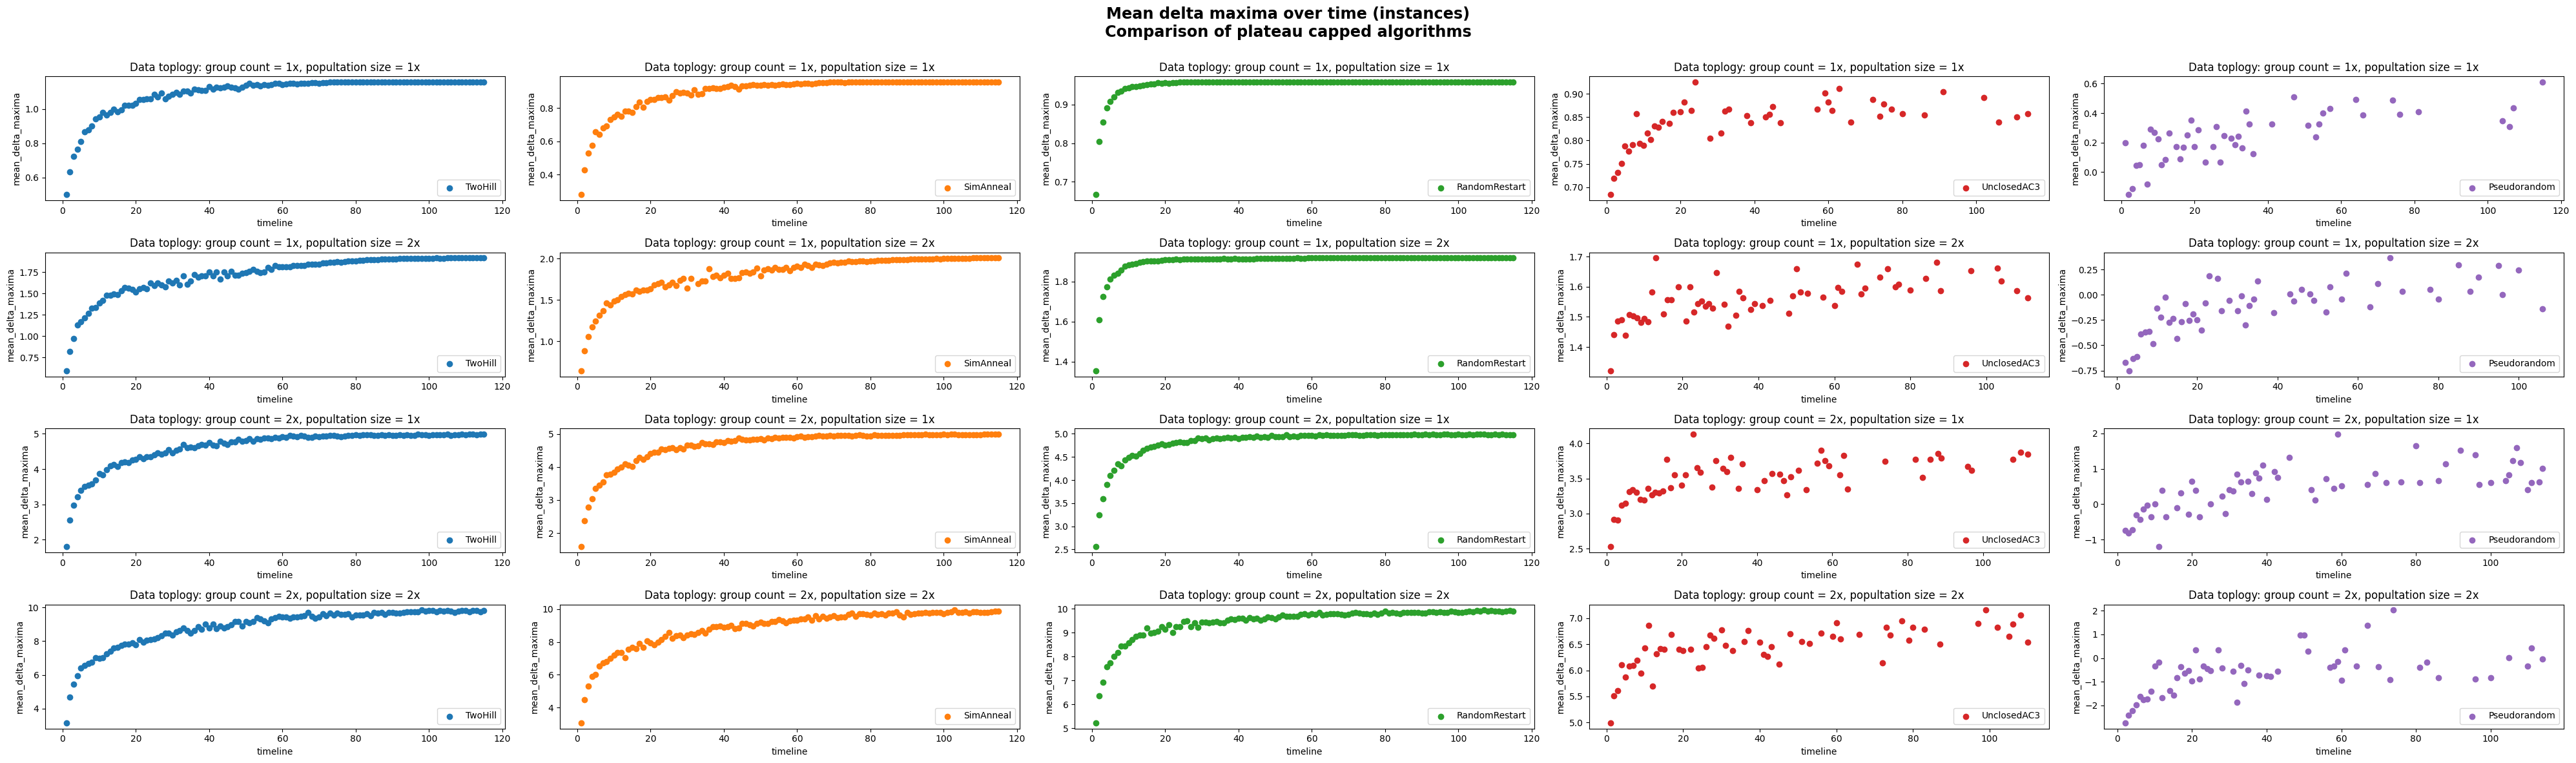

In [99]:
## Plot of mean maxima for all algorithms 

group = 'instance_number'
measurement = 'delta_maxima'

confidence_level = 0.95
interval = 't'
average_method = 'mean'
scalar = 'SEM'

def selectMaximaPlot(df_lst, index_step: int):
    
    def selectExptXPooledInstanceMax(df, expt_name):
        # print(df)
        df = df[df['best_diversity_flag']=='Y']
        # print(df)
        data = groupedAverage(expt_name, df, group, measurement, average_method)
        # print(data)
        return data
    
    def niceExptNamer(string):
        string = string.replace("_30iter", "")
        string = string.replace("_1x_group_count", "")
        string = string.replace("_2x_group_count", "")
        string = string.replace("_1x", "")
        string = string.replace("_2x", "")
        string = string.replace("_no_cap", "")
        string = string.replace("_cap", "")
        return string
        
    def iteratePlot(expt_name, data):
        print()
        print(expt_name)
        nice_name = niceExptNamer(expt_name)
        for name in expt_name_x_subplot_pos_dict.keys():
            if name in expt_name:
                pos = expt_name_x_subplot_pos_dict[name]
        x_data = selectExptXPooledInstanceMax(data, expt_name)
        # print(x_data)
        axs[expt_round][pos].scatter(x_data['instance_number'], 
                                x_data['mean_delta_maxima'], 
                                label=nice_name,
                                c=plot_colour_lst[pos])
        axs[expt_round][pos].set_title(f"{expt_plot_name_lst[expt_round]}")
        axs[expt_round][pos].set(ylabel='mean_delta_maxima')
        axs[expt_round][pos].set(xlabel='timeline')
        axs[expt_round][pos].legend(loc='lower right')
    
    expt_plot_name_lst = ["Data topology: group count = 1x, popultation size = 1x",
                          "Data topology: group count = 1x, popultation size = 2x",
                          "Data topology: group count = 2x, popultation size = 1x",
                          "Data topology: group count = 2x, popultation size = 2x"
                          ]
    df_lst = df_lst.copy()

    expt_round = -1
    fig, axs = plt.subplots(4, 5, figsize=(40, 12))
    plt.suptitle("Mean delta maxima over time (instances)\nComparison of plateau capped algorithms\n", 
                 fontweight='bold',
                 fontsize='xx-large')
    expt_name_x_subplot_pos_dict = {'TwoHill': 0, 
                                    'SimAnneal': 1, 
                                    'RandomRestart': 2,
                                    'UnclosedAC3': 3,
                                    'Pseudorandom': 4}
    plot_colour_lst =['#1f77b4', 
                      '#ff7f0e', 
                      '#2ca02c', 
                      '#d62728', 
                      '#9467bd']
    while expt_round < index_step - 1:      
        print()
        
        expt_round = expt_round + 1
        
        expt_name_0 = str(df_lst[expt_round]) 
        estimates_0 = iteratePlot(expt_name_0, globals()[expt_name_0])
        
        expt_name_1 = str(df_lst[expt_round + index_step])
        estimates_1 = iteratePlot(expt_name_1, globals()[expt_name_1])

        expt_name_2 = str(df_lst[expt_round + index_step*2])
        estimates_2 = iteratePlot(expt_name_2, globals()[expt_name_2])

        expt_name_3 = str(df_lst[expt_round + index_step*3])
        estimates_3 = iteratePlot(expt_name_3, globals()[expt_name_3])

        expt_name_4 = str(df_lst[expt_round + index_step*4])
        estimates_4 = iteratePlot(expt_name_4, globals()[expt_name_4])
    
    plt.tight_layout()

selectMaximaPlot(csv_vars_lst_cap, 4)

## No capping: Visualisation of mean delta maxima achieved over time. (Time = iteration instance) 



TwoHill_30iter_1x_group_count_1x_no_cap

TwoHill_30iter_1x_group_count_1x_no_cap

SimAnneal_30iter_1x_group_count_1x_no_cap

SimAnneal_30iter_1x_group_count_1x_no_cap

RandomRestart_30iter_1x_group_count_1x_no_cap

RandomRestart_30iter_1x_group_count_1x_no_cap

UnclosedAC3_30iter_1x_group_count_1x_no_cap

UnclosedAC3_30iter_1x_group_count_1x_no_cap

Pseudorandom_30iter_1x_group_count_1x_no_cap

Pseudorandom_30iter_1x_group_count_1x_no_cap


TwoHill_30iter_1x_group_count_2x_no_cap

TwoHill_30iter_1x_group_count_2x_no_cap

SimAnneal_30iter_1x_group_count_2x_no_cap

SimAnneal_30iter_1x_group_count_2x_no_cap

RandomRestart_30iter_1x_group_count_2x_no_cap

RandomRestart_30iter_1x_group_count_2x_no_cap

UnclosedAC3_30iter_1x_group_count_2x_no_cap

UnclosedAC3_30iter_1x_group_count_2x_no_cap

Pseudorandom_30iter_1x_group_count_2x_no_cap

Pseudorandom_30iter_1x_group_count_2x_no_cap


TwoHill_30iter_2x_group_count_1x_no_cap

TwoHill_30iter_2x_group_count_1x_no_cap

SimAnneal_30iter_2x_group_

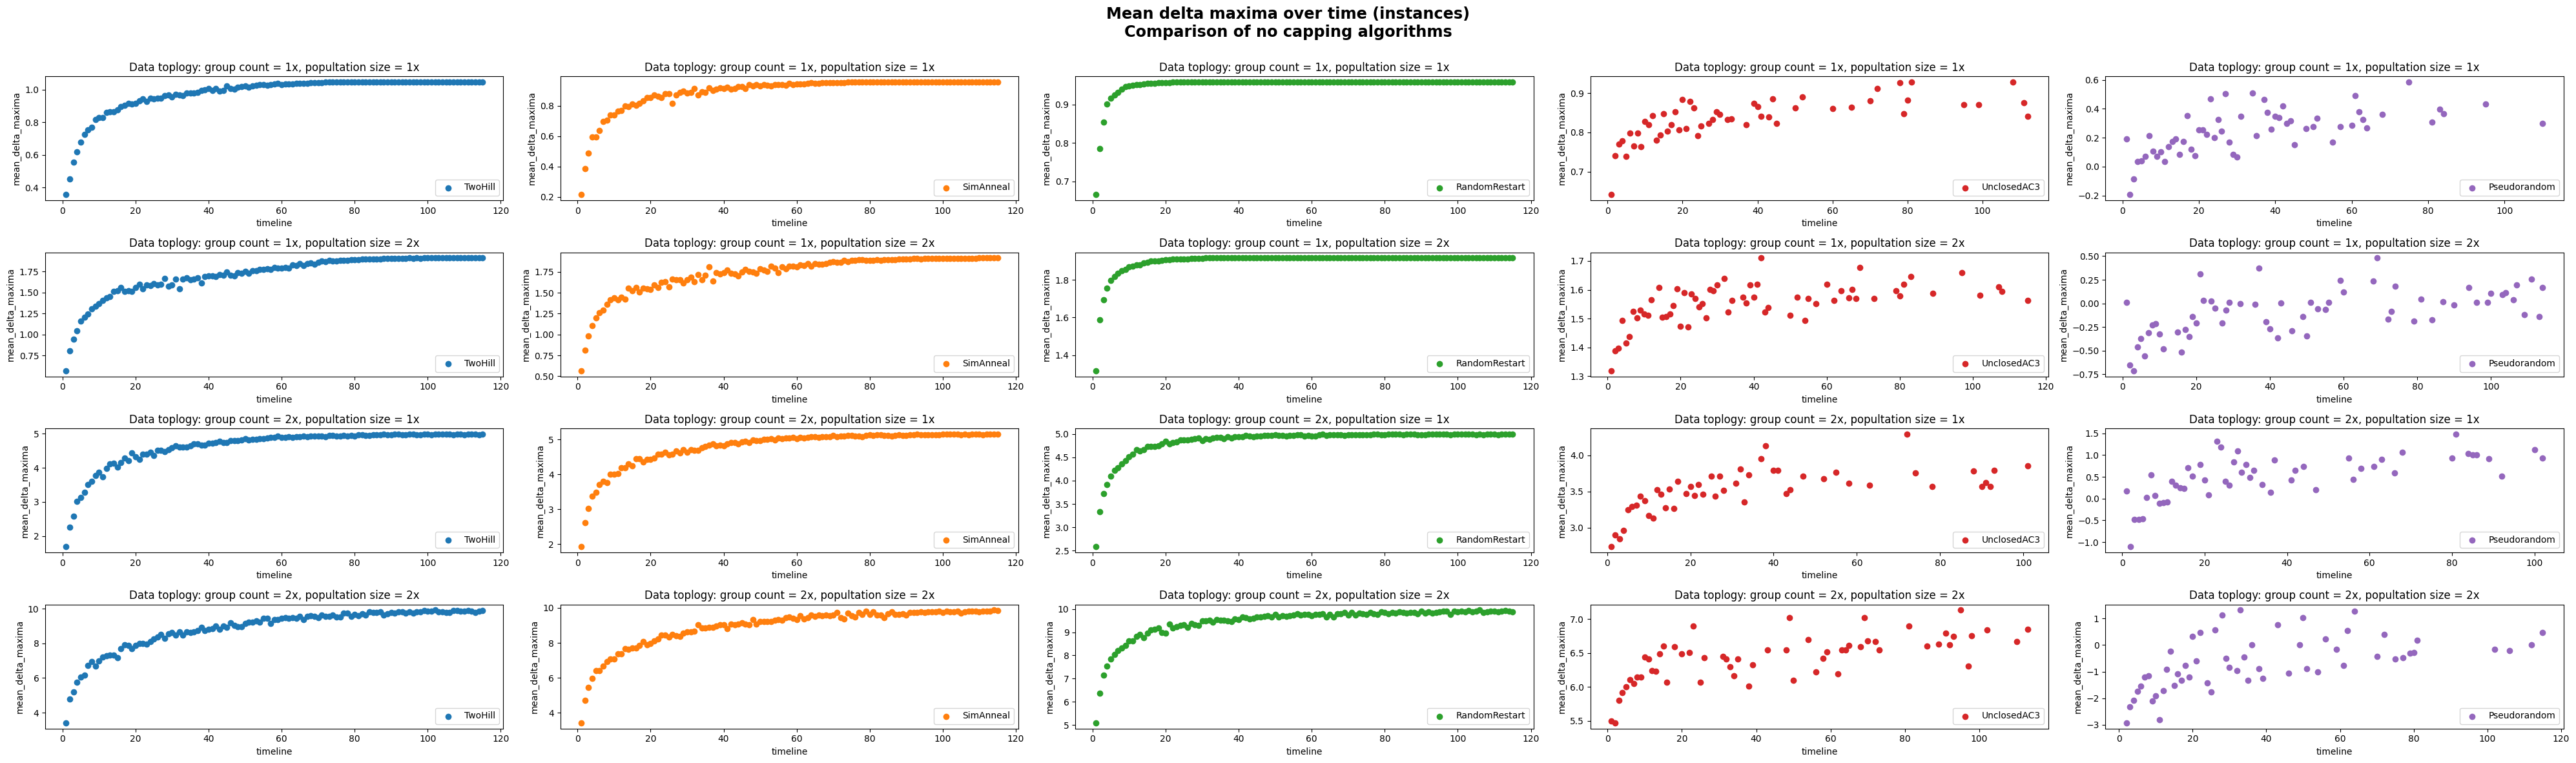

In [100]:
## Plot of mean maxima for all algorithms 

def selectMaximaPlot(df_lst, index_step: int):
    
    def selectExptXPooledInstanceMax(df, expt_name):
        # print(df)
        df = df[df['best_diversity_flag']=='Y']
        # print(df)
        data = groupedAverage(expt_name, df, group, measurement, average_method)
        # print(data)
        return data
    
    def niceExptNamer(string):
        string = string.replace("_30iter", "")
        string = string.replace("_1x_group_count", "")
        string = string.replace("_2x_group_count", "")
        string = string.replace("_1x", "")
        string = string.replace("_2x", "")
        string = string.replace("_no_cap", "")
        string = string.replace("_cap", "")
        return string
        
    def iteratePlot(expt_name, data):
        print()
        print(expt_name)
        nice_name = niceExptNamer(expt_name)
        for name in expt_name_x_subplot_pos_dict.keys():
            if name in expt_name:
                pos = expt_name_x_subplot_pos_dict[name]
        x_data = selectExptXPooledInstanceMax(data, expt_name)
        # print(x_data)
        axs[expt_round][pos].scatter(x_data['instance_number'], 
                                x_data['mean_delta_maxima'], 
                                label=nice_name,
                                c=plot_colour_lst[pos])
        axs[expt_round][pos].set_title(f"{expt_plot_name_lst[expt_round]}")
        axs[expt_round][pos].set(ylabel='mean_delta_maxima')
        axs[expt_round][pos].set(xlabel='timeline')
        axs[expt_round][pos].legend(loc='lower right')
    
    expt_plot_name_lst = ["Data topology: group count = 1x, popultation size = 1x",
                          "Data topology: group count = 1x, popultation size = 2x",
                          "Data topology: group count = 2x, popultation size = 1x",
                          "Data topology: group count = 2x, popultation size = 2x"
                          ]
    df_lst = df_lst.copy()

    expt_round = -1
    fig, axs = plt.subplots(4, 5, figsize=(40, 12))
    plt.suptitle("Mean delta maxima over time (instances)\nComparison of no capping algorithms\n", 
                 fontweight='bold',
                 fontsize='xx-large')
    expt_name_x_subplot_pos_dict = {'TwoHill': 0, 
                                    'SimAnneal': 1, 
                                    'RandomRestart': 2,
                                    'UnclosedAC3': 3,
                                    'Pseudorandom': 4}
    plot_colour_lst =['#1f77b4', 
                      '#ff7f0e', 
                      '#2ca02c', 
                      '#d62728', 
                      '#9467bd']
    while expt_round < index_step - 1:      
        print()
        
        expt_round = expt_round + 1
        
        expt_name_0 = str(df_lst[expt_round]) 
        estimates_0 = iteratePlot(expt_name_0, globals()[expt_name_0])
        
        expt_name_1 = str(df_lst[expt_round + index_step])
        estimates_1 = iteratePlot(expt_name_1, globals()[expt_name_1])

        expt_name_2 = str(df_lst[expt_round + index_step*2])
        estimates_2 = iteratePlot(expt_name_2, globals()[expt_name_2])

        expt_name_3 = str(df_lst[expt_round + index_step*3])
        estimates_3 = iteratePlot(expt_name_3, globals()[expt_name_3])

        expt_name_4 = str(df_lst[expt_round + index_step*4])
        estimates_4 = iteratePlot(expt_name_4, globals()[expt_name_4])
    
    plt.tight_layout()

group = 'instance_number'
measurement = 'delta_maxima'

confidence_level = 0.95
interval = 't'
average_method = 'mean'
scalar = 'SEM'

selectMaximaPlot(csv_vars_lst_no_cap, 4)

## Top performer list: Visualisation of mean delta maxima achieved over time. (Time = iteration instance) 



TwoHill_30iter_1x_group_count_1x_cap

TwoHill_30iter_1x_group_count_1x_cap

SimAnneal_30iter_1x_group_count_1x_cap

SimAnneal_30iter_1x_group_count_1x_cap

RandomRestart_30iter_1x_group_count_1x_cap

RandomRestart_30iter_1x_group_count_1x_cap

UnclosedAC3_30iter_1x_group_count_1x_no_cap

UnclosedAC3_30iter_1x_group_count_1x_no_cap

Pseudorandom_30iter_1x_group_count_1x_no_cap

Pseudorandom_30iter_1x_group_count_1x_no_cap


TwoHill_30iter_1x_group_count_2x_cap

TwoHill_30iter_1x_group_count_2x_cap

SimAnneal_30iter_1x_group_count_2x_cap

SimAnneal_30iter_1x_group_count_2x_cap

RandomRestart_30iter_1x_group_count_2x_cap

RandomRestart_30iter_1x_group_count_2x_cap

UnclosedAC3_30iter_1x_group_count_2x_no_cap

UnclosedAC3_30iter_1x_group_count_2x_no_cap

Pseudorandom_30iter_1x_group_count_2x_no_cap

Pseudorandom_30iter_1x_group_count_2x_no_cap


TwoHill_30iter_2x_group_count_1x_cap

TwoHill_30iter_2x_group_count_1x_cap

SimAnneal_30iter_2x_group_count_1x_no_cap

SimAnneal_30iter_2x_group

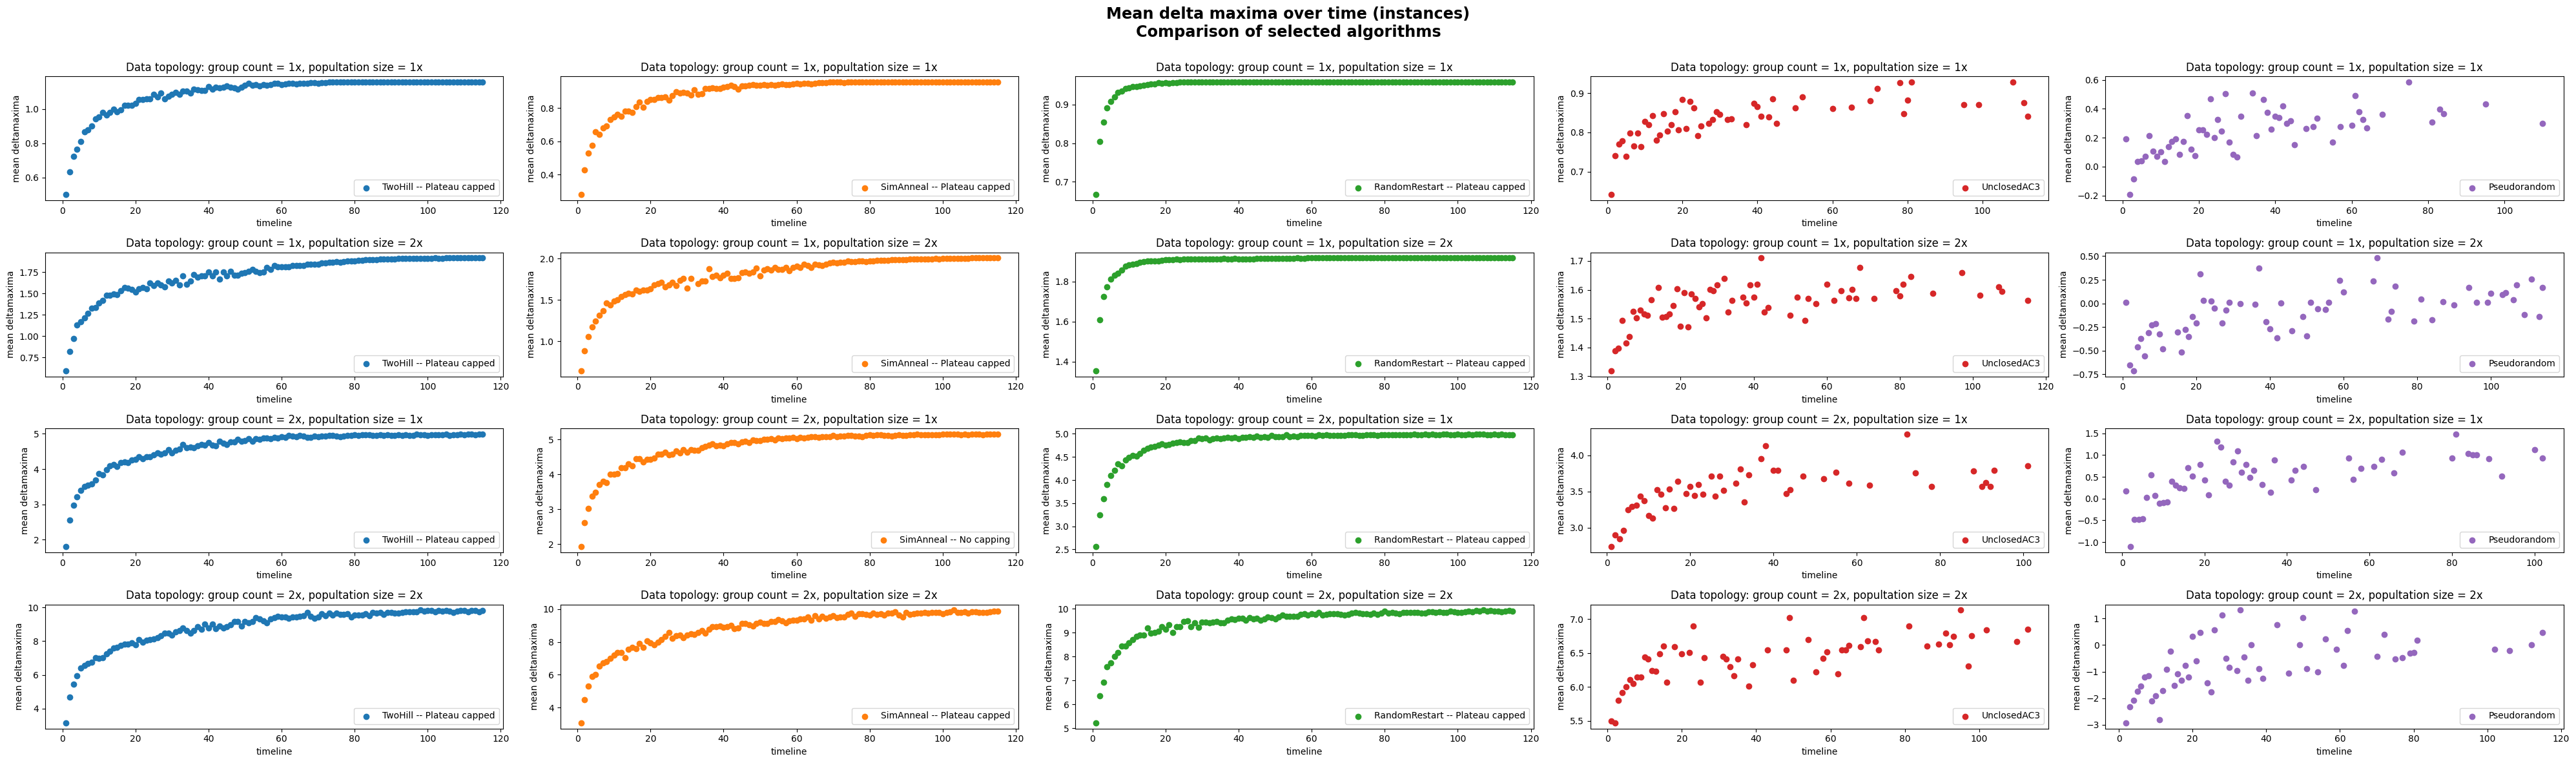

In [109]:
## Plot of mean maxima for all algorithms 

group = 'instance_number'
measurement = 'delta_maxima'

confidence_level = 0.95
interval = 't'
average_method = 'mean'
scalar = 'SEM'
 
def selectMaximaPlot(df_lst, index_step: int):
    
    def selectExptXPooledInstanceMax(df, expt_name):
        # print(df)
        df = df[df['best_diversity_flag']=='Y']
        # print(df)
        data = groupedAverage(expt_name, df, group, measurement, average_method)
        # print(data)
        return data
    
    def niceExptNamer(string):
        string = string.replace('UnclosedAC3_30iter_1x_group_count_1x_no_cap', "UnclosedAC3_30iter_1x_group_count_1x")
        string = string.replace('UnclosedAC3_30iter_1x_group_count_2x_no_cap', "UnclosedAC3_30iter_1x_group_count_2x")
        string = string.replace('UnclosedAC3_30iter_2x_group_count_1x_no_cap', "UnclosedAC3_30iter_2x_group_count_1x")
        string = string.replace('UnclosedAC3_30iter_2x_group_count_2x_no_cap', "UnclosedAC3_30iter_2x_group_count_2x")
        string = string.replace('Pseudorandom_30iter_1x_group_count_1x_no_cap', "Pseudorandom_30iter_1x_group_count_1x")
        string = string.replace('Pseudorandom_30iter_1x_group_count_2x_no_cap', "Pseudorandom_30iter_1x_group_count_2x")
        string = string.replace('Pseudorandom_30iter_2x_group_count_1x_no_cap', "Pseudorandom_30iter_2x_group_count_1x")
        string = string.replace('Pseudorandom_30iter_2x_group_count_2x_no_cap', "Pseudorandom_30iter_2x_group_count_2x")
        string = string.replace("_30iter", "")
        string = string.replace("_1x_group_count", "")
        string = string.replace("_2x_group_count", "")
        string = string.replace("_1x", "")
        string = string.replace("_2x", "")
        string = string.replace("_no_cap", " -- No capping")
        string = string.replace("_cap", " -- Plateau capped")
        return string
        
    def iteratePlot(expt_name, data):
        print()
        print(expt_name)
        nice_name = niceExptNamer(expt_name)
        for name in expt_name_x_subplot_pos_dict.keys():
            if name in expt_name:
                pos = expt_name_x_subplot_pos_dict[name]
        x_data = selectExptXPooledInstanceMax(data, expt_name)
        # print(x_data)
        axs[expt_round][pos].scatter(x_data['instance_number'], 
                                x_data['mean_delta_maxima'], 
                                label=nice_name,
                                c=plot_colour_lst[pos])
        axs[expt_round][pos].set_title(f"{expt_plot_name_lst[expt_round]}")
        axs[expt_round][pos].set(ylabel='mean deltamaxima')
        axs[expt_round][pos].set(xlabel='timeline')
        axs[expt_round][pos].legend(loc='lower right')
    
    expt_plot_name_lst = ["Data topology: group count = 1x, popultation size = 1x",
                          "Data topology: group count = 1x, popultation size = 2x",
                          "Data topology: group count = 2x, popultation size = 1x",
                          "Data topology: group count = 2x, popultation size = 2x"
                          ]
    df_lst = df_lst.copy()

    expt_round = -1
    fig, axs = plt.subplots(4, 5, figsize=(40, 12))
    plt.suptitle("Mean delta maxima over time (instances)\nComparison of selected algorithms\n", 
                 fontweight='bold',
                 fontsize='xx-large')
    expt_name_x_subplot_pos_dict = {'TwoHill': 0, 
                                    'SimAnneal': 1, 
                                    'RandomRestart': 2,
                                    'UnclosedAC3': 3,
                                    'Pseudorandom': 4}
    plot_colour_lst =['#1f77b4', 
                      '#ff7f0e', 
                      '#2ca02c', 
                      '#d62728', 
                      '#9467bd']
    while expt_round < index_step - 1:      
        print()
        
        expt_round = expt_round + 1
        
        expt_name_0 = str(df_lst[expt_round]) 
        estimates_0 = iteratePlot(expt_name_0, globals()[expt_name_0])
        
        expt_name_1 = str(df_lst[expt_round + index_step])
        estimates_1 = iteratePlot(expt_name_1, globals()[expt_name_1])

        expt_name_2 = str(df_lst[expt_round + index_step*2])
        estimates_2 = iteratePlot(expt_name_2, globals()[expt_name_2])

        expt_name_3 = str(df_lst[expt_round + index_step*3])
        estimates_3 = iteratePlot(expt_name_3, globals()[expt_name_3])

        expt_name_4 = str(df_lst[expt_round + index_step*4])
        estimates_4 = iteratePlot(expt_name_4, globals()[expt_name_4])
    
    plt.tight_layout()



group = 'instance_number'
measurement = 'delta_maxima'

confidence_level = 0.95
interval = 't'
average_method = 'mean'
scalar = 'SEM'

selectMaximaPlot(top_df_lst, 4)

## Which is the fastest algorithm? (In terms of iteration instance)

### Code development and function declarations

In [102]:
## Function declaration

import matplotlib.pyplot as plt
import numpy as np
from lifelines import *

def minIndexMaxMaxima(df):
    
    mega_instance_lst = list(df['mega_instance'].unique())

    output_lst = []
    for mega in mega_instance_lst:
        # Max value of max_delta_diversity, by instance in mega
        mega_max_value = df[(df['mega_instance']==1) & (df['best_diversity_flag']=='Y')].groupby('mega_instance')['delta_maxima'].max()
        mega_max_value = mega_max_value.tolist()[0]
        mega_max_value
        
        #  Best_Diversity_Flag is Y x mega_max_value in instance in mega
        filter = (df['delta_maxima']==mega_max_value) & (df['mega_instance']==mega)
        true_x_mega_max_df = df.loc[filter, ['mega_instance','instance_number','delta_maxima','best_diversity_flag']]
        true_x_mega_max_df
        
        # Smallest index matching max
        filter = true_x_mega_max_df.index == true_x_mega_max_df.index.min()
        true_x_mega_max_df = true_x_mega_max_df.loc[filter]
        output = true_x_mega_max_df[['mega_instance', 'instance_number', 'delta_maxima']]
        output = output.rename(columns={'delta_maxima':'max_delta'})
        output_lst.append(output)
    return pd.concat(output_lst)
    
# df = TwoHill_30iter_6size_1x_cap
# print(minIndexMaxMaxima(df))

def exptMinIndexMaxMaxima(df_lst):
    output = []
    for i in range(len(df_lst)):
        df = globals()[df_lst[i]]
        df_name = str(df_lst[i])
        new_df = minIndexMaxMaxima(df)
        new_df['experiment'] = df_name
        new_df = new_df[['experiment', 'mega_instance', 'instance_number', 'max_delta']].reset_index(drop=True)
        output.append(new_df)
        
    return pd.concat(output)

# df_lst = csv_vars_lst_cap
# exptMinIndexMaxMaxima(df_lst)


def selectTTE(tte, df_lst, index_step: int, **kwargs):
    time_slice_end = kwargs.get('time_slice_end', None)
    
    def selectExptXMegaXInstanceMax(df, expt_name):
        data = df[df['experiment']==expt_name][['instance_number','max_delta']]
        # print(data)
        return data
    
    def niceExptNamer(string):
        string = string.replace("_30iter", "")
        string = string.replace("_1x_group_count", "")
        string = string.replace("_2x_group_count", "")
        string = string.replace("_1x", "")
        string = string.replace("_2x", "")
        string = string.replace("_cap", "")
        string = string.replace("_no_cap", "")
        return string
        
    def iterateKMF(expt_name, data):
        print()
        print(expt_name)
        x_data = selectExptXMegaXInstanceMax(exptMinIndexMaxMaxima(data), expt_name).copy(deep=True)
        # print(x_data)
        x_data['max_delta'] = 1 
        x_data  = x_data.reindex(range(30), fill_value = 0)
        # print(x_data)

        alpha = 0.05
        model.fit(x_data['instance_number'], 
                x_data['max_delta'], 
                alpha=alpha, 
                label=niceExptNamer(expt_name))
        
        axs[expt_round].set_title(f"{expt_plot_name_lst[expt_round]}")
        if tte == 'kmf':
            axs[expt_round].set(ylabel='Cumulative probability')
        elif tte == 'naf':
            axs[expt_round].set(ylabel='Cumulative hazard')
        
        if tte == 'kmf':
            if time_slice_end is not None:
                axs[expt_round] = model.plot_cumulative_density(ax=axs[expt_round], 
                                                                loc=slice(0, time_slice_end))
            else:
                axs[expt_round] = model.plot_cumulative_density(ax=axs[expt_round])
            
            estimates = model.cumulative_density_
            estimates['experiment'] = expt_name
            return(model.cumulative_density_)
            
        elif tte == 'naf':
            if time_slice_end is not None:
                axs[expt_round] = model.plot_cumulative_hazard(ax=axs[expt_round],
                                                              loc=slice(0, time_slice_end))
            else:
                axs[expt_round] = model.plot_cumulative_hazard(ax=axs[expt_round])
            
            estimates = model.cumulative_hazard_
            estimates['experiment'] = expt_name
            return(model.cumulative_hazard_)
    
    expt_plot_name_lst = ["Data topology: group count = 1x, popultation size = 1x",
                          "Data topology: group count = 1x, popultation size = 2x",
                          "Data topology: group count = 2x, popultation size = 1x",
                          "Data topology: group count = 2x, popultation size = 2x"]
    df_lst = df_lst.copy()

    tte_dict = {'kmf': KaplanMeierFitter(), 
                'naf': NelsonAalenFitter()}

    model = tte_dict.get(tte) 
    expt_round = -1
    output = []
    fig, axs = plt.subplots(4, 1, figsize=(12, 16))
    if tte == 'kmf':
        if time_slice_end is not None:
            plt.suptitle("Cumulative probability function over time (instances)\nComparison of plateau capped algorithms\n(up to t = {time_slice_end} instances\n",
                         fontweight='bold')
        else:
            plt.suptitle("Cumulative probability function over time (instances)\nComparison of plateau capped algorithms\n",
                         fontweight='bold')
    elif tte == 'naf':
        if time_slice_end is not None:
            plt.suptitle("Cumulative hazard rate for achieving mamximum delta maxima\nComparison of plateau capped algorithms\n(up to t = {time_slice_end} instances\n",
                         fontweight='bold')
        else:
            plt.suptitle("Cumulative hazard rate for achieving mamximum delta maxima\nComparison of plateau capped algorithms\n",
                         fontweight='bold')
            
    while expt_round < index_step - 1:      
        print()
        if time_slice_end is None:
            print('Full timeline')
        else:
            print(f'Timeline (instances) up to and including {time_slice_end}')
        
        expt_round = expt_round + 1
        
        expt_name_0 = str(df_lst[expt_round])
        estimates_0 = iterateKMF(expt_name_0, df_lst)
        output.append(estimates_0)
        
        expt_name_1 = str(df_lst[expt_round + index_step])
        estimates_1 = iterateKMF(expt_name_1, df_lst)
        output.append(estimates_1)

        expt_name_2 = str(df_lst[expt_round + index_step*2])
        estimates_2 = iterateKMF(expt_name_2, df_lst)
        output.append(estimates_2)

        expt_name_3 = str(df_lst[expt_round + index_step*3])
        estimates_3 = iterateKMF(expt_name_3, df_lst)
        output.append(estimates_3)

        expt_name_4 = str(df_lst[expt_round + index_step*4])
        estimates_4 = iterateKMF(expt_name_4, df_lst)
        output.append(estimates_4)
    
    plt.tight_layout()

    return pd.concat(output)
    

### Plateau capped: Time-To-Event (TTE) analysis for earliest max delta maxima 
Using survival analysis. Hazard rate estimation used to estimate the proability to achieve earliest max delta maxima   


Full timeline

TwoHill_30iter_1x_group_count_1x_cap

SimAnneal_30iter_1x_group_count_1x_cap

RandomRestart_30iter_1x_group_count_1x_cap

UnclosedAC3_30iter_1x_group_count_1x_cap

Pseudorandom_30iter_1x_group_count_1x_cap

Full timeline

TwoHill_30iter_1x_group_count_2x_cap

SimAnneal_30iter_1x_group_count_2x_cap

RandomRestart_30iter_1x_group_count_2x_cap

UnclosedAC3_30iter_1x_group_count_2x_cap

Pseudorandom_30iter_1x_group_count_2x_cap

Full timeline

TwoHill_30iter_2x_group_count_1x_cap

SimAnneal_30iter_2x_group_count_1x_cap

RandomRestart_30iter_2x_group_count_1x_cap

UnclosedAC3_30iter_2x_group_count_1x_cap

Pseudorandom_30iter_2x_group_count_1x_cap

Full timeline

TwoHill_30iter_2x_group_count_2x_cap

SimAnneal_30iter_2x_group_count_2x_cap

RandomRestart_30iter_2x_group_count_2x_cap

UnclosedAC3_30iter_2x_group_count_2x_cap

Pseudorandom_30iter_2x_group_count_2x_cap


,TwoHill,experiment,SimAnneal,RandomRestart,UnclosedAC3,Pseudorandom
timeline,,,,,,
0.0,0.000000,TwoHill_30iter_1x_group_count_1x_cap,NaN,NaN,NaN,NaN
39.0,0.090909,TwoHill_30iter_1x_group_count_1x_cap,NaN,NaN,NaN,NaN
54.0,0.190909,TwoHill_30iter_1x_group_count_1x_cap,NaN,NaN,NaN,NaN
55.0,0.302020,TwoHill_30iter_1x_group_count_1x_cap,NaN,NaN,NaN,NaN
56.0,0.427020,TwoHill_30iter_1x_group_count_1x_cap,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
107.0,NaN,RandomRestart_30iter_2x_group_count_2x_cap,NaN,2.592857,NaN,NaN
0.0,NaN,UnclosedAC3_30iter_2x_group_count_2x_cap,NaN,NaN,0.0,NaN
77.0,NaN,UnclosedAC3_30iter_2x_group_count_2x_cap,NaN,NaN,1.0,NaN


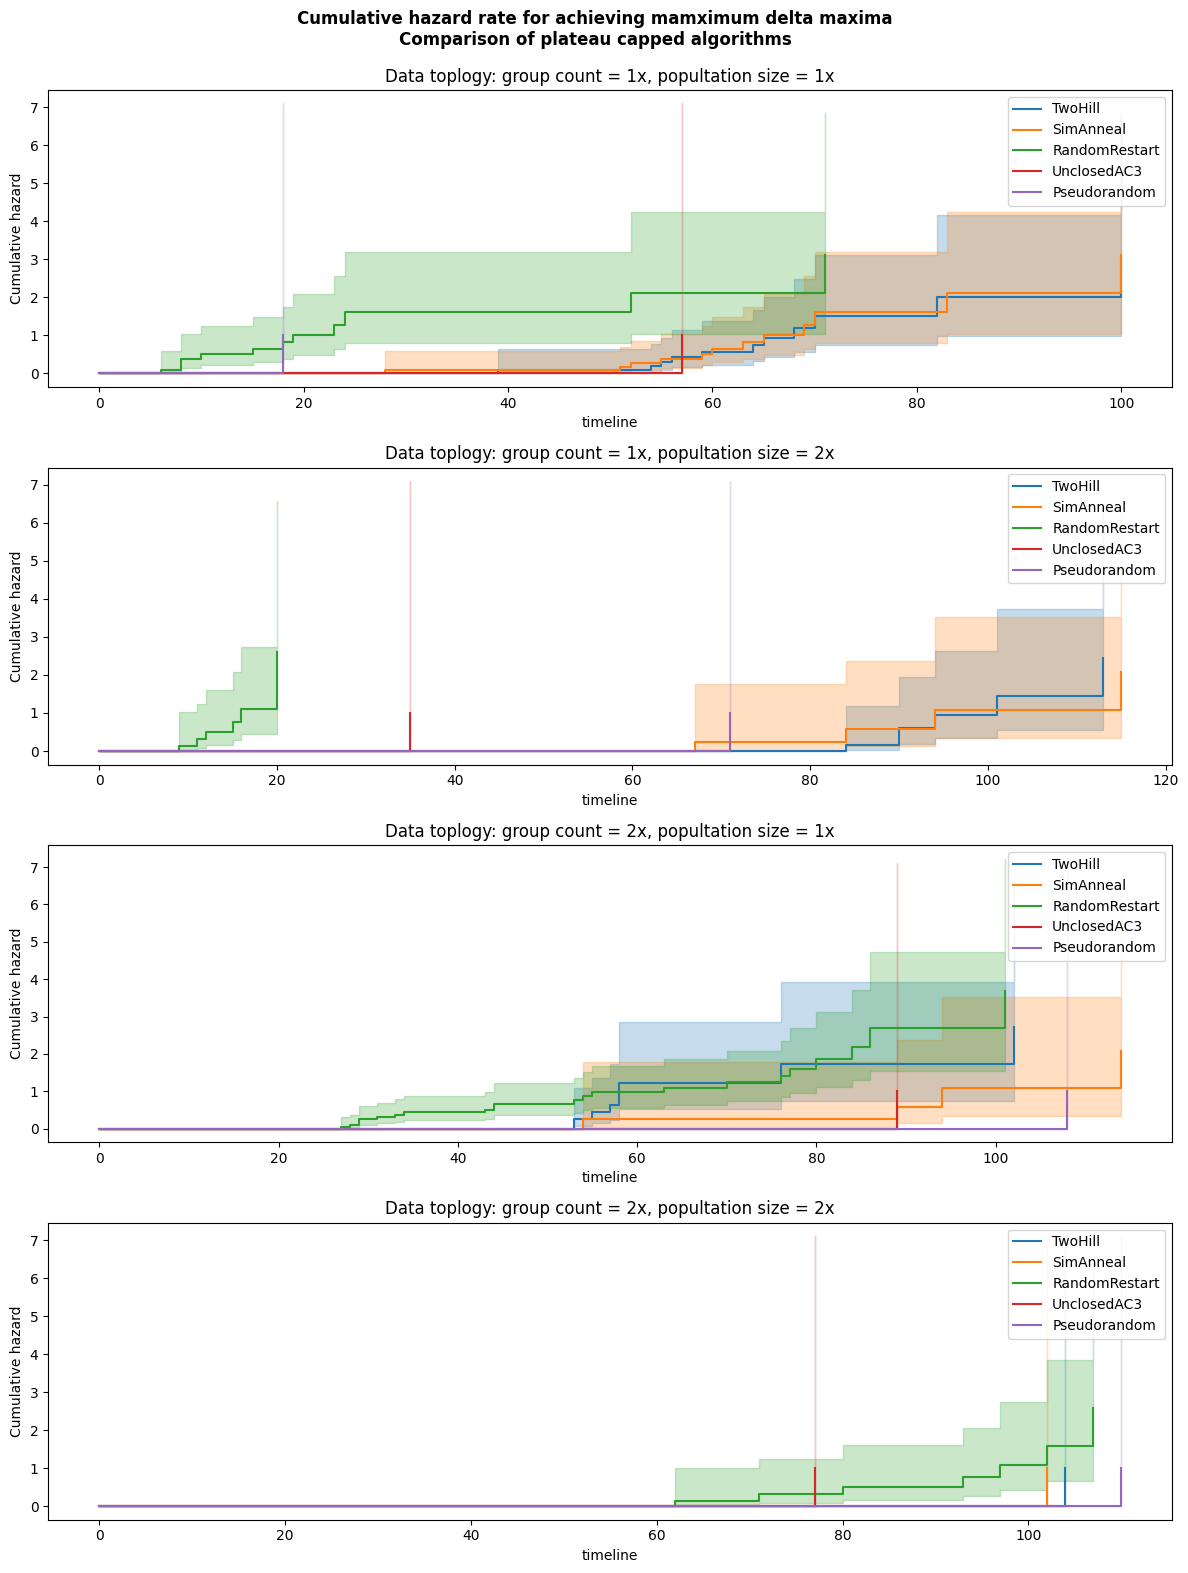

In [103]:
# Plot cumulative hazard function and estimate hazard rate 
estimates = selectTTE('naf', csv_vars_lst_cap, 4)
estimates

In [104]:
estimates.to_csv('estimates.csv')

### Top performer list: Time-To-Event (TTE) analysis for earliest max delta maxima 


Full timeline

TwoHill_30iter_1x_group_count_1x_cap

SimAnneal_30iter_1x_group_count_1x_cap

RandomRestart_30iter_1x_group_count_1x_cap

UnclosedAC3_30iter_1x_group_count_1x_no_cap

Pseudorandom_30iter_1x_group_count_1x_no_cap

Full timeline

TwoHill_30iter_1x_group_count_2x_cap

SimAnneal_30iter_1x_group_count_2x_cap

RandomRestart_30iter_1x_group_count_2x_cap

UnclosedAC3_30iter_1x_group_count_2x_no_cap

Pseudorandom_30iter_1x_group_count_2x_no_cap

Full timeline

TwoHill_30iter_2x_group_count_1x_cap

SimAnneal_30iter_2x_group_count_1x_no_cap

RandomRestart_30iter_2x_group_count_1x_cap

UnclosedAC3_30iter_2x_group_count_1x_no_cap

Pseudorandom_30iter_2x_group_count_1x_no_cap

Full timeline

TwoHill_30iter_2x_group_count_2x_cap

SimAnneal_30iter_2x_group_count_2x_cap

RandomRestart_30iter_2x_group_count_2x_cap

UnclosedAC3_30iter_2x_group_count_2x_no_cap

Pseudorandom_30iter_2x_group_count_2x_no_cap


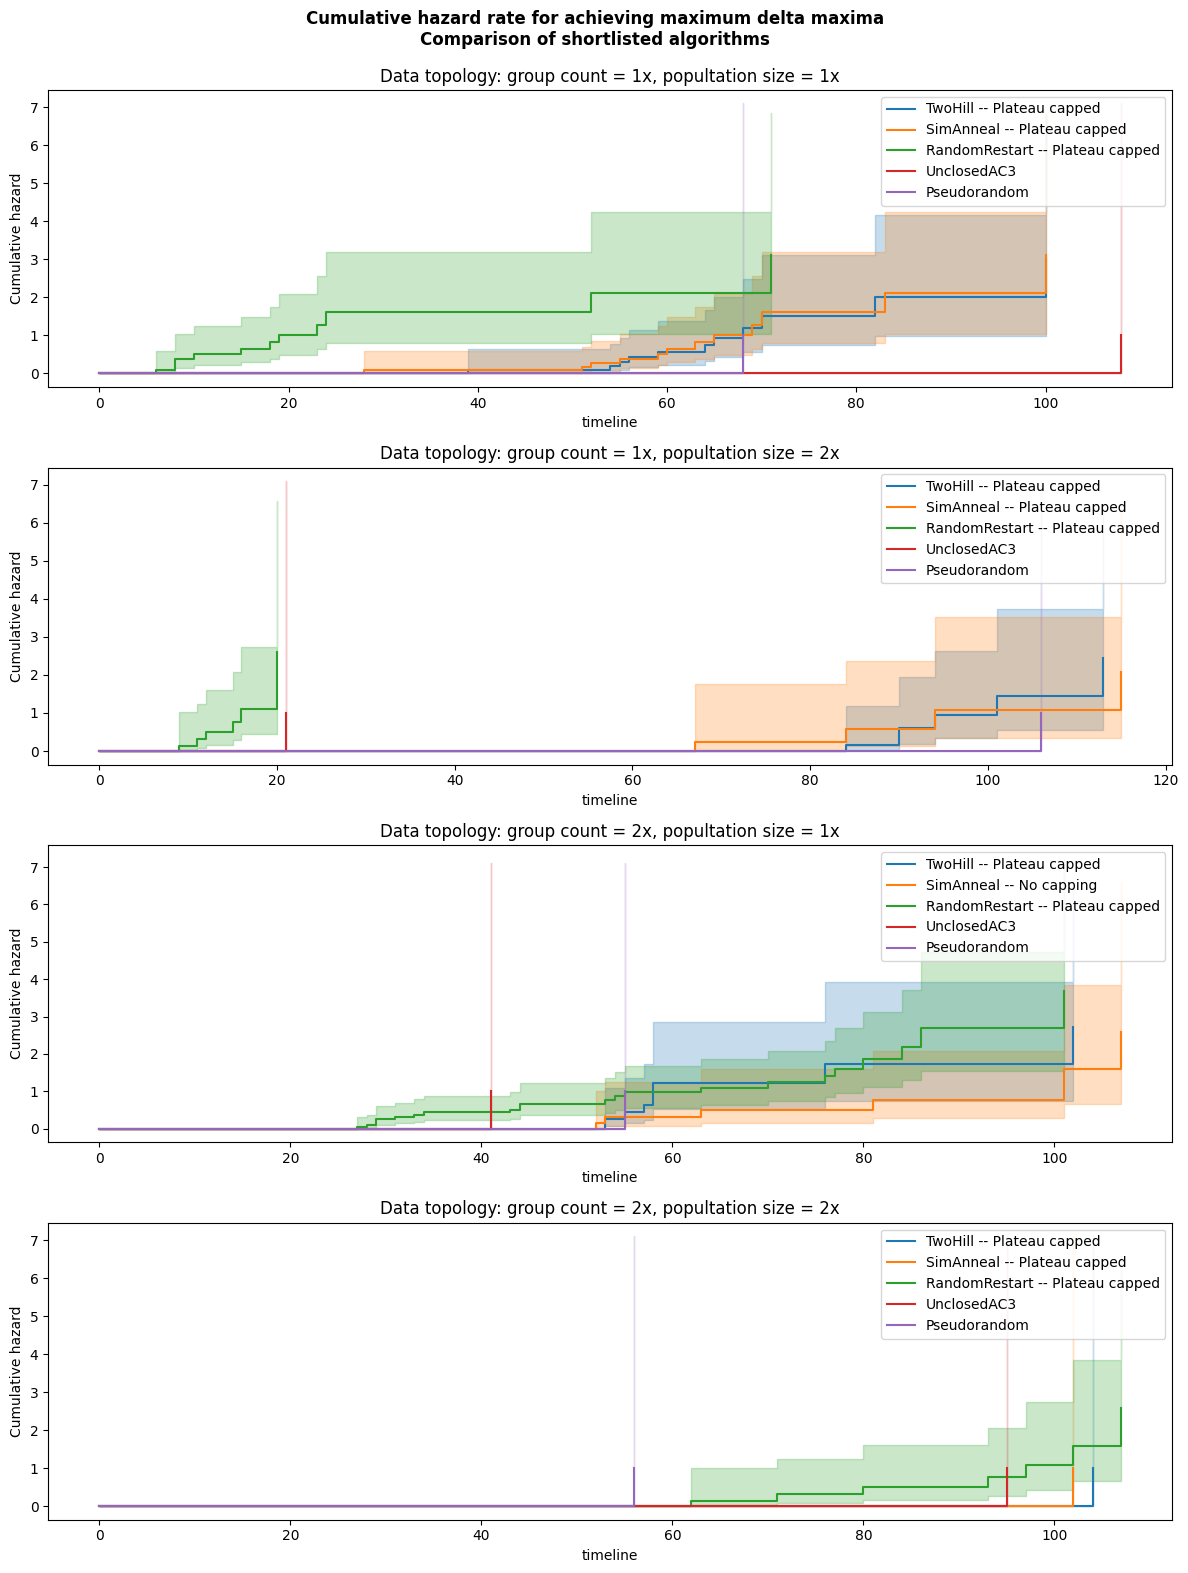

In [110]:
# Plot cumulative hazard function and estimate hazard rate 

def selectTTE(tte, df_lst, index_step: int, **kwargs):
    time_slice_end = kwargs.get('time_slice_end', None)
    
    def selectExptXMegaXInstanceMax(df, expt_name):
        data = df[df['experiment']==expt_name][['instance_number','max_delta']]
        # print(data)
        return data
    
    def niceExptNamer(string):
        string = string.replace('UnclosedAC3_30iter_1x_group_count_1x_no_cap', "UnclosedAC3_30iter_1x_group_count_1x")
        string = string.replace('UnclosedAC3_30iter_1x_group_count_2x_no_cap', "UnclosedAC3_30iter_1x_group_count_2x")
        string = string.replace('UnclosedAC3_30iter_2x_group_count_1x_no_cap', "UnclosedAC3_30iter_2x_group_count_1x")
        string = string.replace('UnclosedAC3_30iter_2x_group_count_2x_no_cap', "UnclosedAC3_30iter_2x_group_count_2x")
        string = string.replace('Pseudorandom_30iter_1x_group_count_1x_no_cap', "Pseudorandom_30iter_1x_group_count_1x")
        string = string.replace('Pseudorandom_30iter_1x_group_count_2x_no_cap', "Pseudorandom_30iter_1x_group_count_2x")
        string = string.replace('Pseudorandom_30iter_2x_group_count_1x_no_cap', "Pseudorandom_30iter_2x_group_count_1x")
        string = string.replace('Pseudorandom_30iter_2x_group_count_2x_no_cap', "Pseudorandom_30iter_2x_group_count_2x")
        string = string.replace("_30iter", "")
        string = string.replace("_1x_group_count", "")
        string = string.replace("_2x_group_count", "")
        string = string.replace("_1x", "")
        string = string.replace("_2x", "")
        string = string.replace("_no_cap", " -- No capping")
        string = string.replace("_cap", " -- Plateau capped")
        return string
        
    def iterateKMF(expt_name, data):
        print()
        print(expt_name)
        x_data = selectExptXMegaXInstanceMax(exptMinIndexMaxMaxima(data), expt_name).copy(deep=True)
        # print(x_data)
        x_data['max_delta'] = 1 
        x_data  = x_data.reindex(range(30), fill_value = 0)
        # print(x_data)

        alpha = 0.05
        model.fit(x_data['instance_number'], 
                x_data['max_delta'], 
                alpha=alpha, 
                label=niceExptNamer(expt_name))
        
        axs[expt_round].set_title(f"{expt_plot_name_lst[expt_round]}")
        if tte == 'kmf':
            axs[expt_round].set(ylabel='Cumulative probability')
        elif tte == 'naf':
            axs[expt_round].set(ylabel='Cumulative hazard')
        
        if tte == 'kmf':
            if time_slice_end is not None:
                axs[expt_round] = model.plot_cumulative_density(ax=axs[expt_round], 
                                                                loc=slice(0, time_slice_end))
            else:
                axs[expt_round] = model.plot_cumulative_density(ax=axs[expt_round])
            
            estimates = model.cumulative_density_
            estimates['experiment'] = expt_name
            return(model.cumulative_density_)
            
        elif tte == 'naf':
            if time_slice_end is not None:
                axs[expt_round] = model.plot_cumulative_hazard(ax=axs[expt_round],
                                                              loc=slice(0, time_slice_end))
            else:
                axs[expt_round] = model.plot_cumulative_hazard(ax=axs[expt_round])
            
            estimates = model.cumulative_hazard_
            estimates['experiment'] = expt_name
            return(model.cumulative_hazard_)
    
    expt_plot_name_lst = ["Data topology: group count = 1x, popultation size = 1x",
                          "Data topology: group count = 1x, popultation size = 2x",
                          "Data topology: group count = 2x, popultation size = 1x",
                          "Data topology: group count = 2x, popultation size = 2x"]
    df_lst = df_lst.copy()

    tte_dict = {'kmf': KaplanMeierFitter(), 
                'naf': NelsonAalenFitter()}

    model = tte_dict.get(tte) 
    expt_round = -1
    output = []
    fig, axs = plt.subplots(4, 1, figsize=(12, 16))
    if tte == 'kmf':
        if time_slice_end is not None:
            plt.suptitle("Cumulative probability function over time (instances)\nComparison of shortlisted algorithms\n(up to t = {time_slice_end} instances\n",
                         fontweight='bold')
        else:
            plt.suptitle("Cumulative probability function over time (instances)\nComparison of shortlisted algorithms\n",
                         fontweight='bold')
    elif tte == 'naf':
        if time_slice_end is not None:
            plt.suptitle("Cumulative hazard rate for achieving maximum delta maxima\nComparison of shortlisted algorithms\n(up to t = {time_slice_end} instances\n",
                         fontweight='bold')
        else:
            plt.suptitle("Cumulative hazard rate for achieving maximum delta maxima\nComparison of shortlisted algorithms\n",
                         fontweight='bold')
            
    while expt_round < index_step - 1:      
        print()
        if time_slice_end is None:
            print('Full timeline')
        else:
            print(f'Timeline (instances) up to and including {time_slice_end}')
        
        expt_round = expt_round + 1
        
        expt_name_0 = str(df_lst[expt_round])
        estimates_0 = iterateKMF(expt_name_0, df_lst)
        output.append(estimates_0)
        
        expt_name_1 = str(df_lst[expt_round + index_step])
        estimates_1 = iterateKMF(expt_name_1, df_lst)
        output.append(estimates_1)

        expt_name_2 = str(df_lst[expt_round + index_step*2])
        estimates_2 = iterateKMF(expt_name_2, df_lst)
        output.append(estimates_2)

        expt_name_3 = str(df_lst[expt_round + index_step*3])
        estimates_3 = iterateKMF(expt_name_3, df_lst)
        output.append(estimates_3)

        expt_name_4 = str(df_lst[expt_round + index_step*4])
        estimates_4 = iterateKMF(expt_name_4, df_lst)
        output.append(estimates_4)
    
    plt.tight_layout()

    return pd.concat(output)
    

top_estimates = selectTTE('naf', top_df_lst, 4)

## Ranking of capped algorithms for each data topology 

In [201]:
def dataMerge(name, data1, data2, group):
    merged = data1.merge(data2, how = 'inner', on = group)
    merged.reset_index(drop=True, inplace=True)
    merged = merged.rename_axis('index')
    print()
    print(name)
    return merged

## Plateau capped comparison

In [202]:
hazards_dict = {'TwoHill_30iter_2x_group_count_1x_cap': 'TwoHill',
                'TwoHill_30iter_2x_group_count_2x_cap': 'TwoHill',
                'TwoHill_30iter_1x_group_count_1x_cap': 'TwoHill',
                'TwoHill_30iter_1x_group_count_2x_cap': 'TwoHill',
                'SimAnneal_30iter_2x_group_count_1x_cap': 'SimAnneal',
                'SimAnneal_30iter_2x_group_count_2x_cap': 'SimAnneal',
                'SimAnneal_30iter_1x_group_count_1x_cap': 'SimAnneal',
                'SimAnneal_30iter_1x_group_count_2x_cap': 'SimAnneal',
                'RandomRestart_30iter_2x_group_count_1x_cap': 'RandomRestart',
                'RandomRestart_30iter_2x_group_count_2x_cap': 'RandomRestart',
                'RandomRestart_30iter_1x_group_count_1x_cap': 'RandomRestart',
                'RandomRestart_30iter_1x_group_count_2x_cap': 'RandomRestart',
                'UnclosedAC3_30iter_2x_group_count_1x_cap': 'UnclosedAC3',
                'UnclosedAC3_30iter_2x_group_count_2x_cap': 'UnclosedAC3',
                'UnclosedAC3_30iter_1x_group_count_1x_cap': 'UnclosedAC3',
                'UnclosedAC3_30iter_1x_group_count_2x_cap': 'UnclosedAC3',
                'Pseudorandom_30iter_2x_group_count_1x_cap': 'Pseudorandom',
                'Pseudorandom_30iter_2x_group_count_2x_cap': 'Pseudorandom',
                'Pseudorandom_30iter_1x_group_count_1x_cap': 'Pseudorandom',
                'Pseudorandom_30iter_1x_group_count_2x_cap': 'Pseudorandom'}

hazards = estimates.reset_index()

data = select2TIndependent(csv_vars_lst_cap, csv_vars_lst_no_cap)
data = data[['capped_expt', 'x_mean_max_delta']]

deg_free = 29
data_grouped_description = exptGroupedCI(csv_vars_lst_cap, 'Capped algorithms')

expt_name_lst = ['_1x_group_count_1x_cap', '_1x_group_count_2x_cap', '_2x_group_count_1x_cap', '_2x_group_count_2x_cap']

output = []
for expt in expt_name_lst:
    filtered = data[data['capped_expt'].str.contains(expt)]
    filtered.sort_values(by='x_mean_max_delta', ascending=False)
    filtered = filtered.rename(columns={'capped_expt':'experiment'})
    filtered = dataMerge(expt, filtered, data_grouped_description, 'experiment')
    filtered = filtered.drop(columns=['x_mean_max_delta']) 
    filtered = filtered.reset_index(drop=True)
    output.append(filtered)
filtered = pd.concat(output).reset_index(drop=True)
filtered['max_delta_instance_hazard'] = float('nan')

for expt in expt_name_lst:
    for expt_name in filtered['experiment'].unique(): 
        target = expt_name
        filter = (hazards[hazards_dict[target]] is not None) & (hazards['experiment'] == target)
        filtered_hazards = hazards[['experiment','timeline']][hazards['timeline'] == hazards.loc[filter, 'timeline'].max()]    
        max_hazard_instance = filtered_hazards['timeline'].values.max()
        filtered.loc[filtered['experiment'] == expt_name, 'max_delta_instance_hazard'] = max_hazard_instance

master_comparision = filtered
master_comparision

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)



Capped algorithms

_1x_group_count_1x_cap

_1x_group_count_2x_cap

_2x_group_count_1x_cap

_2x_group_count_2x_cap


,experiment,shapiro_p_value,mean_max_delta,25th_percentile,50th percentile,75th percentile,SEM,Lower_CI,Upper_CI,max_delta_instance_hazard
0,TwoHill_30iter_1x_group_count_1x_cap,1.134953e-08,1.159540,1.160053,1.160053,1.160053,1.059871e-03,1.157373,1.161708,100.0
1,SimAnneal_30iter_1x_group_count_1x_cap,5.963186e-08,0.957857,0.957020,0.958654,0.958654,1.385960e-03,0.955022,0.960692,100.0
2,RandomRestart_30iter_1x_group_count_1x_cap,1.358093e-05,0.958654,0.958654,0.958654,0.958654,5.296202e-15,0.958654,0.958654,71.0
3,UnclosedAC3_30iter_1x_group_count_1x_cap,4.032934e-01,0.877179,0.861914,0.872615,0.890000,2.182875e-02,0.832534,0.921823,57.0
4,Pseudorandom_30iter_1x_group_count_1x_cap,9.992982e-01,0.400690,0.332883,0.401305,0.474910,9.274216e-02,0.211011,0.590369,18.0
5,TwoHill_30iter_1x_group_count_2x_cap,2.861813e-06,1.916256,1.915129,1.917307,1.917307,1.262869e-03,1.913673,1.918838,113.0
6,SimAnneal_30iter_1x_group_count_2x_cap,7.061972e-09,2.007720,2.008387,2.010007,2.012185,9.109107e-03,1.98909,2.026351,115.0
7,RandomRestart_30iter_1x_group_count_2x_cap,7.766377e-12,1.917235,1.917307,1.917307,1.917307,3.909976e-04,1.916435,1.918035,20.0
8,UnclosedAC3_30iter_1x_group_count_2x_cap,7.737798e-01,1.627140,1.590023,1.628466,1.660281,4.530262e-02,1.534485,1.719794,35.0
9,Pseudorandom_30iter_1x_group_count_2x_cap,6.126299e-01,0.118269,-0.024319,0.142835,0.238024,1.657407e-01,-0.220709,0.457247,71.0


In [203]:
## Kruskal Wallis Test by Expt level

def groupedMegaMax(df_lst):
    output = []
    for i in range(len(df_lst)):
        data = globals()[df_lst[i]]
        data = data.copy(deep=True)
        name = str(df_lst[i])
        data['experiment'] = name
        data = data.rename(columns={'delta_maxima':'max_delta'})
        group = 'experiment'
        measurement = 'max_delta'
    
        mega_max_value = data[(data['best_diversity_flag']=='Y')].groupby([group, 'mega_instance'], as_index=False)['max_delta'].max()
        mega_max_value    
        output.append(mega_max_value)

        expt_x_mega_max_value = pd.concat(output)
    # print(expt_x_mega_max_value)
    return expt_x_mega_max_value


expt_plot_name_lst = ["Data topology: group count = 1x, popultation size = 1x",
                      "Data topology: group count = 1x, popultation size = 2x",
                      "Data topology: group count = 2x, popultation size = 1x",
                      "Data topology: group count = 2x, popultation size = 2x"]


print()
print()
print('''Variant = Plateau Capped''')    
print(f"{expt_plot_name_lst[0]}")

print()
print("Compare all 5 algo")
lst = ['TwoHill_30iter_1x_group_count_1x_cap',
       'SimAnneal_30iter_1x_group_count_1x_cap',
       'RandomRestart_30iter_1x_group_count_1x_cap',
       'UnclosedAC3_30iter_1x_group_count_1x_cap',
       'Pseudorandom_30iter_1x_group_count_1x_cap'
      ]
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[1]]['max_delta']
z_ = comparison_df[comparison_df['experiment']==lst[2]]['max_delta']
aa_ = comparison_df[comparison_df['experiment']==lst[3]]['max_delta']
ab_ = comparison_df[comparison_df['experiment']==lst[4]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 z_,
                                 aa_,
                                 ab_,
                                 nan_policy='raise',
                                 axis=0)
print(select_kw_output)

print()
print("Compare 3 non-control algo")
lst = ['TwoHill_30iter_1x_group_count_1x_cap',
       'SimAnneal_30iter_1x_group_count_1x_cap',
       'RandomRestart_30iter_1x_group_count_1x_cap'
      ]
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[1]]['max_delta']
z_ = comparison_df[comparison_df['experiment']==lst[2]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 z_, 
                                 nan_policy='raise',
                                 axis=0)
print(select_kw_output)

print()
print("Compare TwoHill to SimAnneal")
lst = ['TwoHill_30iter_1x_group_count_1x_cap',
       'SimAnneal_30iter_1x_group_count_1x_cap'
      ]
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[1]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 nan_policy='raise',
                                 axis=0)
print(select_kw_output)

print()
print("Compare TwoHill to RandomRestart")
lst = ['TwoHill_30iter_1x_group_count_1x_cap',
       'RandomRestart_30iter_1x_group_count_1x_cap'
      ]
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[1]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 nan_policy='raise',
                                 axis=0)
print(select_kw_output)

###
print()
print()
print('''Variant = Plateau Capped''')    
print(f"{expt_plot_name_lst[1]}")

print()
print("Compare all 5 algo")
lst = ['TwoHill_30iter_1x_group_count_2x_cap',
       'SimAnneal_30iter_1x_group_count_2x_cap',
       'RandomRestart_30iter_1x_group_count_2x_cap',
       'UnclosedAC3_30iter_1x_group_count_2x_cap',
       'Pseudorandom_30iter_1x_group_count_2x_cap'
      ]
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[1]]['max_delta']
z_ = comparison_df[comparison_df['experiment']==lst[2]]['max_delta']
aa_ = comparison_df[comparison_df['experiment']==lst[3]]['max_delta']
ab_ = comparison_df[comparison_df['experiment']==lst[4]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 z_,
                                 aa_,
                                 ab_,
                                 nan_policy='raise',
                                 axis=0)
print(select_kw_output)

print()
print("Compare 3 non-control algo")
lst = ['TwoHill_30iter_1x_group_count_2x_cap',
       'SimAnneal_30iter_1x_group_count_2x_cap',
       'RandomRestart_30iter_1x_group_count_2x_cap'
      ]
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[1]]['max_delta']
z_ = comparison_df[comparison_df['experiment']==lst[2]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 z_, 
                                 nan_policy='raise',
                                 axis=0)
print(select_kw_output)

print()
print("Compare TwoHill to SimAnneal")
lst = ['TwoHill_30iter_1x_group_count_2x_cap',
       'SimAnneal_30iter_1x_group_count_2x_cap'
      ]
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[1]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 nan_policy='raise',
                                 axis=0)
print(select_kw_output)

print()
print("Compare TwoHill to RandomRestart")
lst = ['TwoHill_30iter_1x_group_count_2x_cap',
       'RandomRestart_30iter_1x_group_count_2x_cap'
      ]
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[1]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 nan_policy='raise',
                                 axis=0)
print(select_kw_output)
# deg_free = 29
# tTest = select2TIndependent([lst[0]], [lst[1]])
# print(tTest)


###
print()
print()
print('''Variant = Plateau Capped''')    
print(f"{expt_plot_name_lst[2]}")

print()
print("Compare all 5 algo")
lst = ['TwoHill_30iter_2x_group_count_1x_cap',
       'SimAnneal_30iter_2x_group_count_1x_cap',
       'RandomRestart_30iter_2x_group_count_1x_cap',
       'UnclosedAC3_30iter_2x_group_count_1x_cap',
       'Pseudorandom_30iter_2x_group_count_1x_cap'
      ]
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[1]]['max_delta']
z_ = comparison_df[comparison_df['experiment']==lst[2]]['max_delta']
aa_ = comparison_df[comparison_df['experiment']==lst[3]]['max_delta']
ab_ = comparison_df[comparison_df['experiment']==lst[4]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 z_,
                                 aa_,
                                 ab_,
                                 nan_policy='raise',
                                 axis=0)
print(select_kw_output)

print()
print("Compare 3 non-control algo")
lst = ['TwoHill_30iter_2x_group_count_1x_cap',
       'SimAnneal_30iter_2x_group_count_1x_cap',
       'RandomRestart_30iter_2x_group_count_1x_cap'
      ]
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[1]]['max_delta']
z_ = comparison_df[comparison_df['experiment']==lst[2]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 z_, 
                                 nan_policy='raise',
                                 axis=0)
print(select_kw_output)

print()
print("Compare TwoHill to SimAnneal")
lst = ['TwoHill_30iter_2x_group_count_1x_cap',
       'SimAnneal_30iter_2x_group_count_1x_cap'
      ]
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[1]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 nan_policy='raise',
                                 axis=0)
print(select_kw_output)

print()
print("Compare TwoHill to RandomRestart")
lst = ['TwoHill_30iter_2x_group_count_1x_cap',
       'RandomRestart_30iter_2x_group_count_1x_cap'
      ]
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[1]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 nan_policy='raise',
                                 axis=0)
print(select_kw_output)


###
print()
print()
print('''Variant = Plateau Capped''')    
print(f"{expt_plot_name_lst[3]}")

print()
print("Compare all 5 algo")
lst = ['TwoHill_30iter_2x_group_count_2x_cap',
       'SimAnneal_30iter_2x_group_count_2x_cap',
       'RandomRestart_30iter_2x_group_count_2x_cap',
       'UnclosedAC3_30iter_2x_group_count_2x_cap',
       'Pseudorandom_30iter_2x_group_count_2x_cap'
      ]
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[1]]['max_delta']
z_ = comparison_df[comparison_df['experiment']==lst[2]]['max_delta']
aa_ = comparison_df[comparison_df['experiment']==lst[3]]['max_delta']
ab_ = comparison_df[comparison_df['experiment']==lst[4]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 z_,
                                 aa_,
                                 ab_,
                                 nan_policy='raise',
                                 axis=0)
print(select_kw_output)

print()
print("Compare 3 non-control algo")
lst = ['TwoHill_30iter_2x_group_count_2x_cap',
       'SimAnneal_30iter_2x_group_count_2x_cap',
       'RandomRestart_30iter_2x_group_count_2x_cap'
      ]
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[1]]['max_delta']
z_ = comparison_df[comparison_df['experiment']==lst[2]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 z_, 
                                 nan_policy='raise',
                                 axis=0)
print(select_kw_output)

print()
print("Compare TwoHill to SimAnneal")
lst = ['TwoHill_30iter_2x_group_count_2x_cap',
       'SimAnneal_30iter_2x_group_count_2x_cap'
      ]
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[1]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 nan_policy='raise',
                                 axis=0)
print(select_kw_output)

print()
print("Compare TwoHill to RandomRestart")
lst = ['TwoHill_30iter_2x_group_count_2x_cap',
       'RandomRestart_30iter_2x_group_count_2x_cap'
      ]
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[1]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 nan_policy='raise',
                                 axis=0)
print(select_kw_output)



Variant = Plateau Capped
Data toplogy: group count = 1x, popultation size = 1x

Compare all 5 algo
KruskalResult(statistic=139.3168006270359, pvalue=3.952800779595289e-29)

Compare 3 non-control algo
KruskalResult(statistic=68.41295646413829, pvalue=1.3941684757814563e-15)

Compare TwoHill to SimAnneal
KruskalResult(statistic=45.2171444791371, pvalue=1.7635445489127158e-11)

Compare TwoHill to RandomRestart
KruskalResult(statistic=45.71543362222349, pvalue=1.3674114138887788e-11)


Variant = Plateau Capped
Data toplogy: group count = 1x, popultation size = 2x

Compare all 5 algo
KruskalResult(statistic=139.27568145667314, pvalue=4.0337358523297314e-29)

Compare 3 non-control algo
KruskalResult(statistic=68.14565135065106, pvalue=1.5935284676695088e-15)

Compare TwoHill to SimAnneal
KruskalResult(statistic=44.87071150921074, pvalue=2.1048271683661747e-11)

Compare TwoHill to RandomRestart
KruskalResult(statistic=16.081491183773075, pvalue=6.067415755076917e-05)


Variant = Plateau Cap

## Top Performer list comparison

In [205]:
hazards_dict = {'TwoHill_30iter_1x_group_count_1x_cap': 'TwoHill -- Plateau capped',
                'TwoHill_30iter_1x_group_count_2x_cap': 'TwoHill -- Plateau capped',
                'TwoHill_30iter_2x_group_count_1x_cap': 'TwoHill -- Plateau capped',
                'TwoHill_30iter_2x_group_count_2x_cap': 'TwoHill -- Plateau capped',
                'SimAnneal_30iter_1x_group_count_1x_cap': 'SimAnneal -- No capping',
                'SimAnneal_30iter_1x_group_count_2x_cap': 'SimAnneal -- Plateau capped',
                'SimAnneal_30iter_2x_group_count_1x_no_cap': 'SimAnneal -- No capping',
                'SimAnneal_30iter_2x_group_count_2x_cap': 'SimAnneal -- Plateau capped',
                'RandomRestart_30iter_1x_group_count_1x_cap': 'RandomRestart -- Plateau capped',
                'RandomRestart_30iter_1x_group_count_2x_cap': 'RandomRestart -- Plateau capped',
                'RandomRestart_30iter_2x_group_count_1x_cap': 'RandomRestart -- Plateau capped',
                'RandomRestart_30iter_2x_group_count_2x_cap': 'RandomRestart -- Plateau capped',
                'UnclosedAC3_30iter_1x_group_count_1x_no_cap': 'UnclosedAC3',
                'UnclosedAC3_30iter_1x_group_count_2x_no_cap': 'UnclosedAC3',
                'UnclosedAC3_30iter_2x_group_count_1x_no_cap': 'UnclosedAC3',
                'UnclosedAC3_30iter_2x_group_count_2x_no_cap': 'UnclosedAC3',
                'Pseudorandom_30iter_1x_group_count_1x_no_cap': 'Pseudorandom',
                'Pseudorandom_30iter_1x_group_count_2x_no_cap': 'Pseudorandom',
                'Pseudorandom_30iter_2x_group_count_1x_no_cap': 'Pseudorandom',
                'Pseudorandom_30iter_2x_group_count_2x_no_cap': 'Pseudorandom'}

hazards = top_estimates.reset_index()
# print(hazards)

data = select2TIndependent(top_df_lst, top_df_lst)
data = data[['capped_expt', 'x_mean_max_delta']]

deg_free = 29
data_grouped_description = exptGroupedCI(top_df_lst, 'Top performer algorithms')

expt_name_lst = ['_1x_group_count_1x', '_1x_group_count_2x', '_2x_group_count_1x', '_2x_group_count_2x']

output = []
for expt in expt_name_lst:
    filtered = data[data['capped_expt'].str.contains(expt)]
    filtered.sort_values(by='x_mean_max_delta', ascending=False)
    filtered = filtered.rename(columns={'capped_expt':'experiment'})
    filtered = dataMerge(expt, filtered, data_grouped_description, 'experiment')
    filtered = filtered.drop(columns=['x_mean_max_delta']) 
    filtered = filtered.reset_index(drop=True)
    output.append(filtered)
filtered = pd.concat(output).reset_index(drop=True)
filtered['max_delta_instance_hazard'] = float('nan')

for expt in expt_name_lst:
    for expt_name in filtered['experiment'].unique(): 
        target = expt_name
        # print(target)
        # print(hazards[hazards_dict[target]])
        filter = (hazards[hazards_dict[target]] is not None) & (hazards['experiment'] == target)
        filtered_hazards = hazards[['experiment','timeline']][hazards['timeline'] == hazards.loc[filter, 'timeline'].max()]    
        max_hazard_instance = filtered_hazards['timeline'].values.max()
        filtered.loc[filtered['experiment'] == expt_name, 'max_delta_instance_hazard'] = max_hazard_instance

master_comparision = filtered
master_comparision

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)



Top performer algorithms

_1x_group_count_1x

_1x_group_count_2x

_2x_group_count_1x

_2x_group_count_2x


,experiment,shapiro_p_value,mean_max_delta,25th_percentile,50th percentile,75th percentile,SEM,Lower_CI,Upper_CI,max_delta_instance_hazard
0,TwoHill_30iter_1x_group_count_1x_cap,1.134953e-08,1.159540,1.160053,1.160053,1.160053,1.059871e-03,1.157373,1.161708,100.0
1,SimAnneal_30iter_1x_group_count_1x_cap,5.963186e-08,0.957857,0.957020,0.958654,0.958654,1.385960e-03,0.955022,0.960692,100.0
2,RandomRestart_30iter_1x_group_count_1x_cap,1.358093e-05,0.958654,0.958654,0.958654,0.958654,5.296202e-15,0.958654,0.958654,71.0
3,UnclosedAC3_30iter_1x_group_count_1x_no_cap,3.613494e-01,0.883293,0.862250,0.879162,0.905215,2.916280e-02,0.823649,0.942938,108.0
4,Pseudorandom_30iter_1x_group_count_1x_no_cap,6.157478e-01,0.387519,0.329668,0.370110,0.444962,7.648261e-02,0.231095,0.543944,68.0
5,TwoHill_30iter_1x_group_count_2x_cap,2.861813e-06,1.916256,1.915129,1.917307,1.917307,1.262869e-03,1.913673,1.918838,113.0
6,SimAnneal_30iter_1x_group_count_2x_cap,7.061972e-09,2.007720,2.008387,2.010007,2.012185,9.109107e-03,1.98909,2.026351,115.0
7,RandomRestart_30iter_1x_group_count_2x_cap,7.766377e-12,1.917235,1.917307,1.917307,1.917307,3.909976e-04,1.916435,1.918035,20.0
8,UnclosedAC3_30iter_1x_group_count_2x_no_cap,7.520206e-02,1.622848,1.594241,1.614968,1.658293,4.102626e-02,1.53894,1.706756,21.0
9,Pseudorandom_30iter_1x_group_count_2x_no_cap,7.718439e-01,0.119958,0.028639,0.104137,0.218915,1.458575e-01,-0.178354,0.41827,106.0




Data topology: group count = 1x, popultation size = 1x

Compare all 5 algo
KruskalResult(statistic=137.5462445135147, pvalue=9.460207409576656e-29)

Compare TwoHill to SimAnneal
Mann Whitney U: Equal
MannwhitneyuResult(statistic=900.0, pvalue=1.751127196298616e-11)

Compare TwoHill to RandomRestart
Mann Whitney U: Equal
MannwhitneyuResult(statistic=900.0, pvalue=1.751127196298616e-11)

Compare TwoHill to UnclosedAC3
Mann Whitney U: Equal
MannwhitneyuResult(statistic=900.0, pvalue=1.751127196298616e-11)

Compare TwoHill to Pseudorandom
Mann Whitney U: Equal
MannwhitneyuResult(statistic=900.0, pvalue=2.34505337627435e-11)


Data topology: group count = 1x, popultation size = 2x

Compare all 5 algo
KruskalResult(statistic=139.27568145667314, pvalue=4.0337358523297314e-29)

Compare TwoHill to SimAnneal
Mann Whitney U: Equal
MannwhitneyuResult(statistic=0.0, pvalue=2.2147264650551318e-11)

Compare TwoHill to RandomRestart
Mann Whitney U: Equal
MannwhitneyuResult(statistic=195.5, pvalue=6.

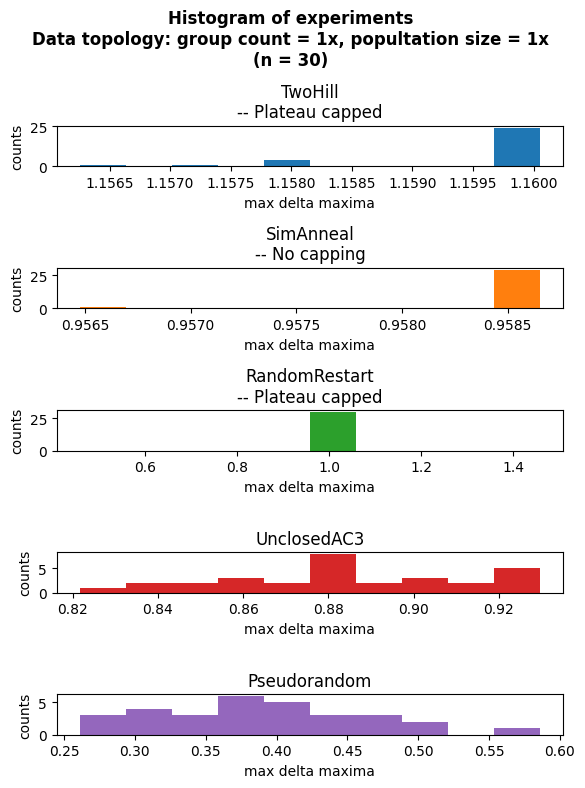

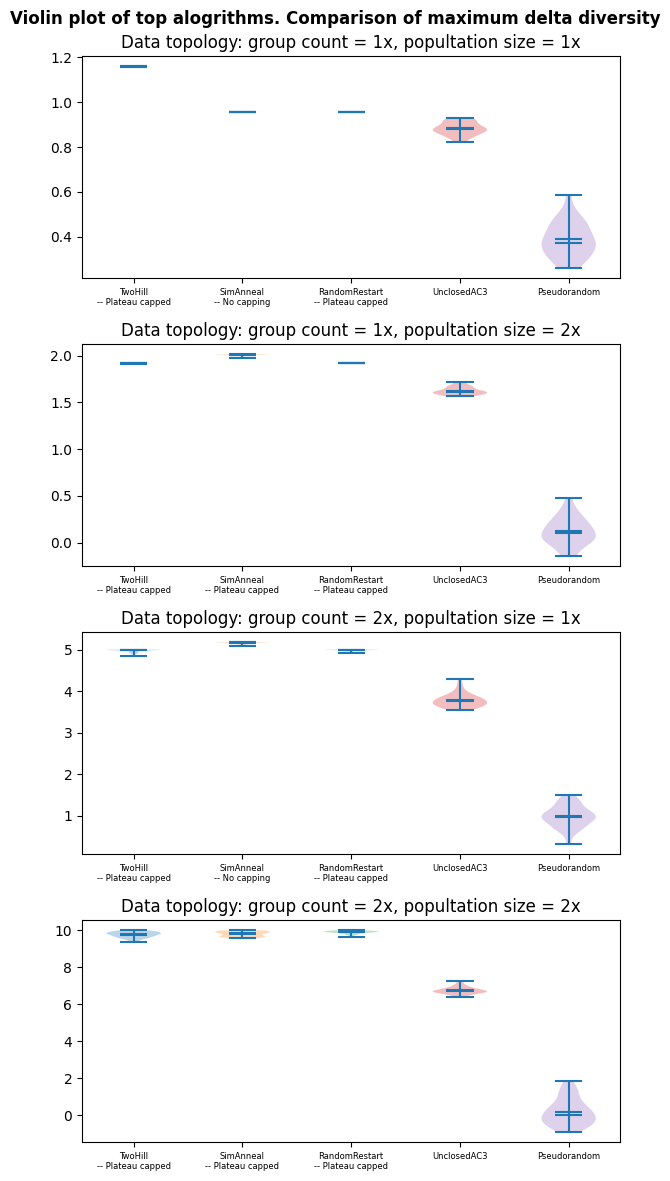

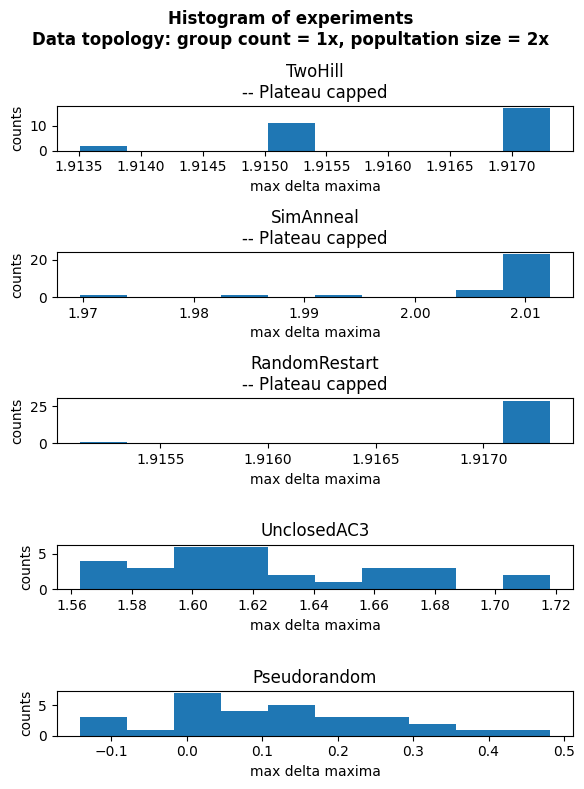

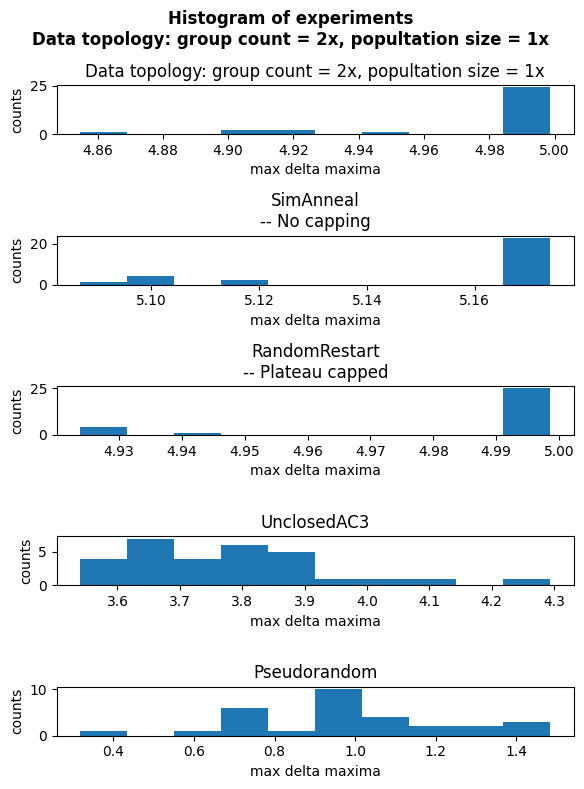

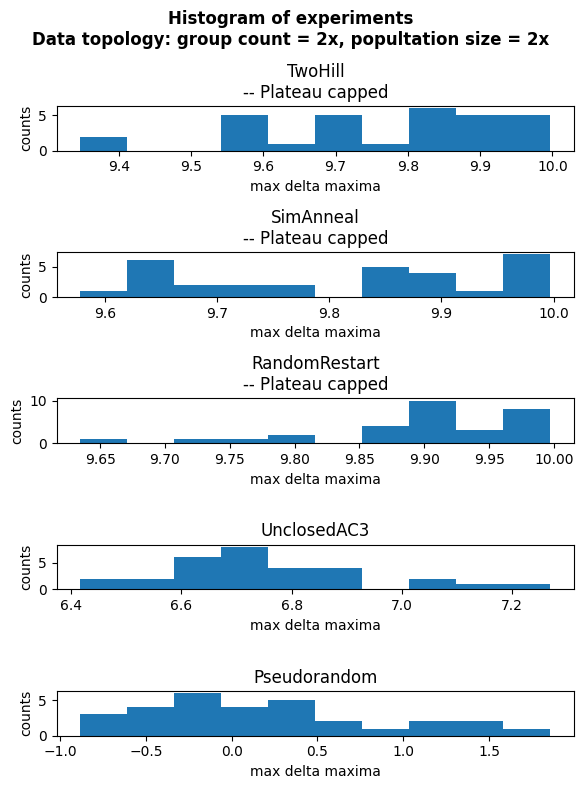

In [111]:
## Kruskal Wallis Test by Expt level


hazards_dict = {'TwoHill_30iter_1x_group_count_1x_cap': 'TwoHill\n-- Plateau capped',
                'TwoHill_30iter_1x_group_count_2x_cap': 'TwoHill\n-- Plateau capped',
                'TwoHill_30iter_2x_group_count_1x_cap': 'TwoHill\n-- Plateau capped',
                'TwoHill_30iter_2x_group_count_2x_cap': 'TwoHill\n-- Plateau capped',
                'SimAnneal_30iter_1x_group_count_1x_cap': 'SimAnneal\n-- No capping',
                'SimAnneal_30iter_1x_group_count_2x_cap': 'SimAnneal\n -- Plateau capped',
                'SimAnneal_30iter_2x_group_count_1x_no_cap': 'SimAnneal\n -- No capping',
                'SimAnneal_30iter_2x_group_count_2x_cap': 'SimAnneal\n-- Plateau capped',
                'RandomRestart_30iter_1x_group_count_1x_cap': 'RandomRestart\n-- Plateau capped',
                'RandomRestart_30iter_1x_group_count_2x_cap': 'RandomRestart\n-- Plateau capped',
                'RandomRestart_30iter_2x_group_count_1x_cap': 'RandomRestart\n-- Plateau capped',
                'RandomRestart_30iter_2x_group_count_2x_cap': 'RandomRestart\n-- Plateau capped',
                'UnclosedAC3_30iter_1x_group_count_1x_no_cap': 'UnclosedAC3',
                'UnclosedAC3_30iter_1x_group_count_2x_no_cap': 'UnclosedAC3',
                'UnclosedAC3_30iter_2x_group_count_1x_no_cap': 'UnclosedAC3',
                'UnclosedAC3_30iter_2x_group_count_2x_no_cap': 'UnclosedAC3',
                'Pseudorandom_30iter_1x_group_count_1x_no_cap': 'Pseudorandom',
                'Pseudorandom_30iter_1x_group_count_2x_no_cap': 'Pseudorandom',
                'Pseudorandom_30iter_2x_group_count_1x_no_cap': 'Pseudorandom',
                'Pseudorandom_30iter_2x_group_count_2x_no_cap': 'Pseudorandom'}

def niceExptNamer(string):
    string = string.replace('UnclosedAC3_30iter_1x_group_count_1x_no_cap', "UnclosedAC3_30iter_1x_group_count_1x")
    string = string.replace('UnclosedAC3_30iter_1x_group_count_2x_no_cap', "UnclosedAC3_30iter_1x_group_count_2x")
    string = string.replace('UnclosedAC3_30iter_2x_group_count_1x_no_cap', "UnclosedAC3_30iter_2x_group_count_1x")
    string = string.replace('UnclosedAC3_30iter_2x_group_count_2x_no_cap', "UnclosedAC3_30iter_2x_group_count_2x")
    string = string.replace('Pseudorandom_30iter_1x_group_count_1x_no_cap', "Pseudorandom_30iter_1x_group_count_1x")
    string = string.replace('Pseudorandom_30iter_1x_group_count_2x_no_cap', "Pseudorandom_30iter_1x_group_count_2x")
    string = string.replace('Pseudorandom_30iter_2x_group_count_1x_no_cap', "Pseudorandom_30iter_2x_group_count_1x")
    string = string.replace('Pseudorandom_30iter_2x_group_count_2x_no_cap', "Pseudorandom_30iter_2x_group_count_2x")
    string = string.replace("_30iter", "")
    string = string.replace("_1x_group_count", "")
    string = string.replace("_2x_group_count", "")
    string = string.replace("_1x", "")
    string = string.replace("_2x", "")
    string = string.replace("_no_cap", "\n-- No capping")
    string = string.replace("_cap", "\n-- Plateau capped")
    return string

def groupedMegaMax(df_lst):
    output = []
    for i in range(len(df_lst)):
        data = globals()[df_lst[i]]
        data = data.copy(deep=True)
        name = str(df_lst[i])
        data['experiment'] = name
        data = data.rename(columns={'delta_maxima':'max_delta'})
        group = 'experiment'
        measurement = 'max_delta'
    
        mega_max_value = data[(data['best_diversity_flag']=='Y')].groupby([group, 'mega_instance'], as_index=False)['max_delta'].max()
        mega_max_value    
        output.append(mega_max_value)

        expt_x_mega_max_value = pd.concat(output)
    # print(expt_x_mega_max_value)
    return expt_x_mega_max_value


expt_plot_name_lst = ["Data topology: group count = 1x, popultation size = 1x",
                      "Data topology: group count = 1x, popultation size = 2x",
                      "Data topology: group count = 2x, popultation size = 1x",
                      "Data topology: group count = 2x, popultation size = 2x"]


print()
print()
print(f"{expt_plot_name_lst[0]}")

print()
print("Compare all 5 algo")
lst = ['TwoHill_30iter_1x_group_count_1x_cap',
'SimAnneal_30iter_1x_group_count_1x_no_cap',
'RandomRestart_30iter_1x_group_count_1x_cap',
'UnclosedAC3_30iter_1x_group_count_1x_no_cap',
'Pseudorandom_30iter_1x_group_count_1x_no_cap']
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[1]]['max_delta']
z_ = comparison_df[comparison_df['experiment']==lst[2]]['max_delta']
aa_ = comparison_df[comparison_df['experiment']==lst[3]]['max_delta']
ab_ = comparison_df[comparison_df['experiment']==lst[4]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 z_,
                                 aa_,
                                 ab_,
                                 nan_policy='raise',
                                 axis=0)
print(select_kw_output)

plot_colour_lst =['#1f77b4', 
                      '#ff7f0e', 
                      '#2ca02c', 
                      '#d62728', 
                      '#9467bd']

fig1, axs1 = plt.subplots(5, 1, figsize=(6, 8))
fig1.suptitle(f"Histogram of experiments\n{expt_plot_name_lst[0]}\n(n = 30)", 
                 fontweight='bold')

axs1[0].hist(x_, color=plot_colour_lst[0])
axs1[0].set_title(f"{niceExptNamer(lst[0])}")
axs1[0].set(ylabel='counts')
axs1[0].set(xlabel='max delta maxima')
axs1[1].hist(y_, color=plot_colour_lst[1])
axs1[1].set_title(f"{niceExptNamer(lst[1])}")
axs1[1].set(ylabel='counts')
axs1[1].set(xlabel='max delta maxima')
axs1[2].hist(z_.astype(np.float32), color=plot_colour_lst[2])
axs1[2].set_title(f"{niceExptNamer(lst[2])}")
axs1[2].set(ylabel='counts')
axs1[2].set(xlabel='max delta maxima')
axs1[3].hist(aa_, color=plot_colour_lst[3])
axs1[3].set_title(f"{niceExptNamer(lst[3])}")
axs1[3].set(ylabel='counts')
axs1[3].set(xlabel='max delta maxima')
axs1[4].hist(ab_.values, color=plot_colour_lst[4])
axs1[4].set_title(f"{niceExptNamer(lst[4])}")
axs1[4].set(ylabel='counts')
axs1[4].set(xlabel='max delta maxima')
fig1.tight_layout()


violin, ax = plt.subplots(4, 1, figsize=(6, 12))
violin.suptitle(f"Violin plot of top alogrithms. Comparison of maximum delta diversity", 
                 fontweight='bold')
ax[0].set_title(f"{expt_plot_name_lst[0]}")
parts = ax[0].violinplot([x_, y_, z_, aa_, ab_], showmeans=True, showmedians=True, showextrema=True)
for pc, color in zip(parts['bodies'], plot_colour_lst):
    pc.set_facecolor(color)
ax[0].set_xticks([1,2,3,4,5])
ax[0].set_xticklabels([niceExptNamer(lst[0]), niceExptNamer(lst[1]), niceExptNamer(lst[2]), niceExptNamer(lst[3]), niceExptNamer(lst[4])])
ax[0].tick_params(axis='x', labelsize=6)
violin.tight_layout()



print()
print("Compare TwoHill to SimAnneal")
comparison_df = groupedMegaMax(lst)
x = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y = comparison_df[comparison_df['experiment']==lst[1]]['max_delta']
select_kw_output = stats.kruskal(x, 
                                 y, 
                                 nan_policy='raise',
                                 axis=0)
select_mann_eq_output = stats.mannwhitneyu(x_, 
                                  y_,
                                  alternative='two-sided',
                                  nan_policy='raise')
print("Mann Whitney U: Equal")
print(select_mann_eq_output)

print()
print("Compare TwoHill to RandomRestart")
comparison_df = groupedMegaMax(lst)
x = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y = comparison_df[comparison_df['experiment']==lst[2]]['max_delta']
select_kw_output = stats.kruskal(x, 
                                 y, 
                                 nan_policy='raise',
                                 axis=0)
select_mann_eq_output = stats.mannwhitneyu(x_, 
                                  y_,
                                  alternative='two-sided',
                                  nan_policy='raise')
print("Mann Whitney U: Equal")
print(select_mann_eq_output)

print()
print("Compare TwoHill to UnclosedAC3")
comparison_df = groupedMegaMax(lst)
x = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y = comparison_df[comparison_df['experiment']==lst[3]]['max_delta']
select_kw_output = stats.kruskal(x, 
                                 y, 
                                 nan_policy='raise',
                                 axis=0)
select_mann_eq_output = stats.mannwhitneyu(x_, 
                                  y_,
                                  alternative='two-sided',
                                  nan_policy='raise')
print("Mann Whitney U: Equal")
print(select_mann_eq_output)

print()
print("Compare TwoHill to Pseudorandom")
comparison_df = groupedMegaMax(lst)
x = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y = comparison_df[comparison_df['experiment']==lst[4]]['max_delta']
select_kw_output = stats.kruskal(x, 
                                 y, 
                                 nan_policy='raise',
                                 axis=0)
select_mann_eq_output = stats.mannwhitneyu(x, 
                                  y,
                                  alternative='two-sided',
                                  nan_policy='raise')
print("Mann Whitney U: Equal")
print(select_mann_eq_output)


###
print()
print()
print(f"{expt_plot_name_lst[1]}")

print()
print("Compare all 5 algo")
lst = ['TwoHill_30iter_1x_group_count_2x_cap',
'SimAnneal_30iter_1x_group_count_2x_cap',
'RandomRestart_30iter_1x_group_count_2x_cap',
'UnclosedAC3_30iter_1x_group_count_2x_no_cap',
'Pseudorandom_30iter_1x_group_count_2x_no_cap']
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[1]]['max_delta']
z_ = comparison_df[comparison_df['experiment']==lst[2]]['max_delta']
aa_ = comparison_df[comparison_df['experiment']==lst[3]]['max_delta']
ab_ = comparison_df[comparison_df['experiment']==lst[4]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 z_,
                                 aa_,
                                 ab_,
                                 nan_policy='raise',
                                 axis=0)
print(select_kw_output)

fig2, axs2 = plt.subplots(5, 1, figsize=(6, 8))
fig2.suptitle(f"Histogram of experiments\n{expt_plot_name_lst[1]}", 
                 fontweight='bold')
axs2[0].hist(x_)
axs2[0].set_title(f"{niceExptNamer(lst[0])}")
axs2[0].set(ylabel='counts')
axs2[0].set(xlabel='max delta maxima')
axs2[1].hist(y_)
axs2[1].set_title(f"{niceExptNamer(lst[1])}")
axs2[1].set(ylabel='counts')
axs2[1].set(xlabel='max delta maxima')
axs2[2].hist(z_)
axs2[2].set_title(f"{niceExptNamer(lst[2])}")
axs2[2].set(ylabel='counts')
axs2[2].set(xlabel='max delta maxima')
axs2[3].hist(aa_)
axs2[3].set_title(f"{niceExptNamer(lst[3])}")
axs2[3].set(ylabel='counts')
axs2[3].set(xlabel='max delta maxima')
axs2[4].hist(ab_)
axs2[4].set_title(f"{niceExptNamer(lst[4])}")
axs2[4].set(ylabel='counts')
axs2[4].set(xlabel='max delta maxima')
fig2.tight_layout()


ax[1].set_title(f"{expt_plot_name_lst[1]}")
parts = ax[1].violinplot([x_, y_, z_, aa_, ab_], showmeans=True, showmedians=True, showextrema=True)
for pc, color in zip(parts['bodies'], plot_colour_lst):
    pc.set_facecolor(color)
ax[1].set_xticks([1,2,3,4,5])
ax[1].set_xticklabels([niceExptNamer(lst[0]), niceExptNamer(lst[1]), niceExptNamer(lst[2]), niceExptNamer(lst[3]), niceExptNamer(lst[4])])
ax[1].tick_params(axis='x', labelsize=6)
violin.tight_layout()


print()
print("Compare TwoHill to SimAnneal")
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[1]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 nan_policy='raise',
                                 axis=0)
select_mann_eq_output = stats.mannwhitneyu(x_, 
                                  y_,
                                  alternative='two-sided',
                                  nan_policy='raise')
print("Mann Whitney U: Equal")
print(select_mann_eq_output)

print()
print("Compare TwoHill to RandomRestart")
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[2]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 nan_policy='raise',
                                 axis=0)
select_mann_eq_output = stats.mannwhitneyu(x_, 
                                  y_,
                                  alternative='two-sided',
                                  nan_policy='raise')
print("Mann Whitney U: Equal")
print(select_mann_eq_output)

print()
print("Compare TwoHill to UnclosedAC3")
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[3]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 nan_policy='raise',
                                 axis=0)
select_mann_eq_output = stats.mannwhitneyu(x_, 
                                  y_,
                                  alternative='two-sided',
                                  nan_policy='raise')
print("Mann Whitney U: Equal")
print(select_mann_eq_output)

print()
print("Compare TwoHill to Pseudorandom")
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[4]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 nan_policy='raise',
                                 axis=0)
select_mann_eq_output = stats.mannwhitneyu(x_, 
                                  y_,
                                  alternative='two-sided',
                                  nan_policy='raise')
print("Mann Whitney U: Equal")
print(select_mann_eq_output)


###
print()
print()
print(f"{expt_plot_name_lst[2]}")

print()
print("Compare all 5 algo")
lst = ['TwoHill_30iter_2x_group_count_1x_cap',
'SimAnneal_30iter_2x_group_count_1x_no_cap',
'RandomRestart_30iter_2x_group_count_1x_cap',
'UnclosedAC3_30iter_2x_group_count_1x_no_cap',
'Pseudorandom_30iter_2x_group_count_1x_no_cap']
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[1]]['max_delta']
z_ = comparison_df[comparison_df['experiment']==lst[2]]['max_delta']
aa_ = comparison_df[comparison_df['experiment']==lst[3]]['max_delta']
ab_ = comparison_df[comparison_df['experiment']==lst[4]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 z_,
                                 aa_,
                                 ab_,
                                 nan_policy='raise',
                                 axis=0)
print(select_kw_output)

fig3, axs3 = plt.subplots(5, 1, figsize=(6, 8))
fig3.suptitle(f"Histogram of experiments\n{expt_plot_name_lst[2]}", 
                 fontweight='bold')
axs3[0].hist(x_)
axs3[0].set_title(f"{expt_plot_name_lst[2]}")
axs3[0].set(ylabel='counts')
axs3[0].set(xlabel='max delta maxima')
axs3[1].hist(y_)
axs3[1].set_title(f"{niceExptNamer(lst[1])}")
axs3[1].set(ylabel='counts')
axs3[1].set(xlabel='max delta maxima')
axs3[2].hist(z_)
axs3[2].set_title(f"{niceExptNamer(lst[2])}")
axs3[2].set(ylabel='counts')
axs3[2].set(xlabel='max delta maxima')
axs3[3].hist(aa_)
axs3[3].set_title(f"{niceExptNamer(lst[3])}")
axs3[3].set(ylabel='counts')
axs3[3].set(xlabel='max delta maxima')
axs3[4].hist(ab_)
axs3[4].set_title(f"{niceExptNamer(lst[4])}")
axs3[4].set(ylabel='counts')
axs3[4].set(xlabel='max delta maxima')
fig3.tight_layout()

ax[2].set_title(f"{expt_plot_name_lst[2]}")
parts = ax[2].violinplot([x_, y_, z_, aa_, ab_], showmeans=True, showmedians=True, showextrema=True)
for pc, color in zip(parts['bodies'], plot_colour_lst):
    pc.set_facecolor(color)
ax[2].set_xticks([1,2,3,4,5])
ax[2].set_xticklabels([niceExptNamer(lst[0]), niceExptNamer(lst[1]), niceExptNamer(lst[2]), niceExptNamer(lst[3]), niceExptNamer(lst[4])])
ax[2].tick_params(axis='x', labelsize=6)
violin.tight_layout()

print()
print("Compare TwoHill to SimAnneal")
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[1]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 nan_policy='raise',
                                 axis=0)
select_mann_eq_output = stats.mannwhitneyu(x_, 
                                  y_,
                                  alternative='two-sided',
                                  nan_policy='raise')
print("Mann Whitney U: Equal")
print(select_mann_eq_output)

print()
print("Compare TwoHill to RandomRestart")
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[2]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 nan_policy='raise',
                                 axis=0)
select_mann_eq_output = stats.mannwhitneyu(x_, 
                                  y_,
                                  alternative='two-sided',
                                  nan_policy='raise')
print("Mann Whitney U: Equal")
print(select_mann_eq_output)

print()
print("Compare TwoHill to UnclosedAC3")
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[3]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 nan_policy='raise',
                                 axis=0)
select_mann_eq_output = stats.mannwhitneyu(x_, 
                                  y_,
                                  alternative='two-sided',
                                  nan_policy='raise')
print("Mann Whitney U: Equal")
print(select_mann_eq_output)

print()
print("Compare TwoHill to Pseudorandom")
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[4]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 nan_policy='raise',
                                 axis=0)
select_mann_eq_output = stats.mannwhitneyu(x_, 
                                  y_,
                                  alternative='two-sided',
                                  nan_policy='raise')
print("Mann Whitney U: Equal")
print(select_mann_eq_output)


###
print()
print()
print(f"{expt_plot_name_lst[3]}")

print()
print("Compare all 5 algo")
lst = ['TwoHill_30iter_2x_group_count_2x_cap',
'SimAnneal_30iter_2x_group_count_2x_cap',
'RandomRestart_30iter_2x_group_count_2x_cap',
'UnclosedAC3_30iter_2x_group_count_2x_no_cap',
'Pseudorandom_30iter_2x_group_count_2x_no_cap']
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[1]]['max_delta']
z_ = comparison_df[comparison_df['experiment']==lst[2]]['max_delta']
aa_ = comparison_df[comparison_df['experiment']==lst[3]]['max_delta']
ab_ = comparison_df[comparison_df['experiment']==lst[4]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 z_,
                                 aa_,
                                 ab_,
                                 nan_policy='raise',
                                 axis=0)
print(select_kw_output)

fig4, axs4 = plt.subplots(5, 1, figsize=(6, 8))
fig4.suptitle(f"Histogram of experiments\n{expt_plot_name_lst[3]}", 
                 fontweight='bold')
axs4[0].hist(x_)
axs4[0].set_title(f"{niceExptNamer(lst[0])}")
axs4[0].set(ylabel='counts')
axs4[0].set(xlabel='max delta maxima')
axs4[1].hist(y_)
axs4[1].set_title(f"{niceExptNamer(lst[1])}")
axs4[1].set(ylabel='counts')
axs4[1].set(xlabel='max delta maxima')
axs4[2].hist(z_)
axs4[2].set_title(f"{niceExptNamer(lst[2])}")
axs4[2].set(ylabel='counts')
axs4[2].set(xlabel='max delta maxima')
axs4[3].hist(aa_)
axs4[3].set_title(f"{niceExptNamer(lst[3])}")
axs4[3].set(ylabel='counts')
axs4[3].set(xlabel='max delta maxima')
axs4[4].hist(ab_)
axs4[4].set_title(f"{niceExptNamer(lst[4])}")
axs4[4].set(ylabel='counts')
axs4[4].set(xlabel='max delta maxima')
fig4.tight_layout()

ax[3].set_title(f"{expt_plot_name_lst[3]}")
parts = ax[3].violinplot([x_, y_, z_, aa_, ab_], showmeans=True, showmedians=True, showextrema=True)
for pc, color in zip(parts['bodies'], plot_colour_lst):
    pc.set_facecolor(color)
ax[3].set_xticks([1,2,3,4,5])
ax[3].set_xticklabels([niceExptNamer(lst[0]), niceExptNamer(lst[1]), niceExptNamer(lst[2]), niceExptNamer(lst[3]), niceExptNamer(lst[4])])
ax[3].tick_params(axis='x', labelsize=6)
violin.tight_layout()

print()
print("Compare TwoHill to SimAnneal")
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[1]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 nan_policy='raise',
                                 axis=0)
select_mann_eq_output = stats.mannwhitneyu(x_, 
                                  y_,
                                  alternative='two-sided',
                                  nan_policy='raise')
print("Mann Whitney U: Equal")
print(select_mann_eq_output)

print()
print("Compare TwoHill to RandomRestart")
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[2]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 nan_policy='raise',
                                 axis=0)
select_mann_eq_output = stats.mannwhitneyu(x_, 
                                  y_,
                                  alternative='two-sided',
                                  nan_policy='raise')
print("Mann Whitney U: Equal")
print(select_mann_eq_output)

print()
print("Compare TwoHill to UnclosedAC3")
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[3]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 nan_policy='raise',
                                 axis=0)
select_mann_eq_output = stats.mannwhitneyu(x_, 
                                  y_,
                                  alternative='two-sided',
                                  nan_policy='raise')
print("Mann Whitney U: Equal")
print(select_mann_eq_output)

print()
print("Compare TwoHill to Pseudorandom")
comparison_df = groupedMegaMax(lst)
x_ = comparison_df[comparison_df['experiment']==lst[0]]['max_delta']
y_ = comparison_df[comparison_df['experiment']==lst[4]]['max_delta']
select_kw_output = stats.kruskal(x_, 
                                 y_, 
                                 nan_policy='raise',
                                 axis=0)
select_mann_eq_output = stats.mannwhitneyu(x_, 
                                  y_,
                                  alternative='two-sided',
                                  nan_policy='raise')
print("Mann Whitney U: Equal")
print(select_mann_eq_output)



